In [37]:
from netCDF4 import Dataset, num2date
import numpy as np
import pandas as pd
import xarray as xr
import os
import time
import matplotlib.pyplot as plt
import matplotlib
import gc
from matplotlib import transforms
import matplotlib.colors as clrs
import glob

Load surface chlorophyll obs 

In [77]:
for i in np.arange(0,12):
    filename = "/gpfs/fs7/dfo/hpcmc/comda/stod000/DATA/CHL/chl_monthly_"+str(i+1)+"_CREG025.nc"
    data = Dataset(filename, "r", format="NETCDF4")
    X = data.variables['chlor_a'][:]
    if i==0:
        [ny,nx]=np.shape(X)
        obsCHL=np.zeros((12,ny,nx))
    obsCHL[i,:,:]=X

print(np.shape(obsCHL), np.nanmin(obsCHL), np.nanmean(obsCHL), np.nanmax(obsCHL))

# The code block below just subsets the summer month data it doesn't take a time average:
#for i in np.arange(4,8):
#    filename = "/gpfs/fs7/dfo/hpcmc/comda/stod000/DATA/CHL/chl_monthly_"+str(i+1)+"_CREG025.nc"
#    datas = Dataset(filename, "r", format="NETCDF4")
#    Xs = datas.variables['chlor_a'][:]
#    if i==4:
#        [ny,nx]=np.shape(Xs)
#        obsCHLs=np.zeros((12,ny,nx))
#    obsCHLs[i,:,:]=Xs

# This code takes a time average of the months of May-September, 
# but it changes the shape from [12,735,528] to [735,528]
obsCHLs=(obsCHL[4,:,:]*31.+obsCHL[5,:,:]*30.+obsCHL[6,:,:]*31.+obsCHL[7,:,:]*31.+obsCHL[8,:,:]*30.)/153.
obsCHLs=obsCHLs.squeeze()


print(np.shape(obsCHLs), np.nanmin(obsCHLs), np.nanmean(obsCHLs), np.nanmax(obsCHLs))


/tmp/ipykernel_475643/3120922330.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = data.variables['chlor_a'][:]


(12, 735, 528) 0.00011352175351930782 0.6027154007775487 41.551353454589844
(735, 528) 0.011876319726819502 0.768213397285583 33.790682200512855


Load POC obs

In [78]:
for i in np.arange(0,12):
    filename = "/gpfs/fs7/dfo/hpcmc/comda/stod000/DATA/POC/poc_monthly_"+str(i+1)+"_CREG025.nc"
    data = Dataset(filename, "r", format="NETCDF4")
    X = data.variables['poc'][:]
    X = X/12
    if i==0:
        [ny,nx]=np.shape(X)
        obsPOC=np.zeros((12,ny,nx))
    obsPOC[i,:,:]=X

print(np.shape(obsPOC), np.nanmin(obsPOC), np.nanmean(obsPOC), np.nanmax(obsPOC))

# The code block below just subsets the summer month data it doesn't take a time average:
#for i in np.arange(4,8):
#    filename = "/gpfs/fs7/dfo/hpcmc/comda/stod000/DATA/POC/poc_monthly_"+str(i+1)+"_CREG025.nc"
#    datas = Dataset(filename, "r", format="NETCDF4")
#    Xs = datas.variables['poc'][:]
#    Xs = Xs/12
#    if i==4:
#        [ny,nx]=np.shape(Xs)
#        obsPOCs=np.zeros((12,ny,nx))
#    obsPOCs[i,:,:]=Xs

# This code takes a time average of the months of May-September, 
# but it changes the shape from [12,735,528] to [735,528]
obsPOCs=(obsPOC[4,:,:]*31.+obsPOC[5,:,:]*30.+obsPOC[6,:,:]*31.+obsPOC[7,:,:]*31.+obsPOC[8,:,:]*30.)/153.
obsPOCs=obsPOCs.squeeze()

print(np.shape(obsPOCs), np.nanmin(obsPOCs), np.nanmean(obsPOCs), np.nanmax(obsPOCs))


/tmp/ipykernel_475643/4285724876.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = data.variables['poc'][:]


(12, 735, 528) 0.0 6.68426298497456 83.33333587646484
(735, 528) 0.0 7.179880434499939 77.93026917900136


In [5]:
data_file = Dataset("/gpfs/fs7/dfo/hpcmc/comda/stod000/CREG25/regions_mask_6.nc", "r", format="NETCDF4")
regindx = (data_file['regions_mask'][:])
print(regindx.shape)

data_file = Dataset("/home/fid000/WORK7/ANALYSIS/DATA/CREG025_mesh_mask.nc", "r", format="NETCDF4")
tmask = (data_file['tmask'][0,:,:,:])
print(tmask.shape)

print(np.nanmin(regindx),np.nanmean(regindx),np.nanmax(regindx))
print(np.min(tmask),np.mean(tmask),np.max(tmask))

tmask0=tmask[0,:,:].squeeze()

nxy=np.size(regindx)
I = np.reshape(regindx, (nxy,))
nreg=int(max(I))
mask = regindx
mask = mask.flatten()

(735, 528)


/tmp/ipykernel_475643/2096643997.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  regindx = (data_file['regions_mask'][:])
/tmp/ipykernel_475643/2096643997.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tmask = (data_file['tmask'][0,:,:,:])


(75, 735, 528)
0.0 2.0095472683383417 9.0
0 0.3011297327011613 1


In [79]:
filein = ("/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/POC/CREG025_LIM3_CANOE-VJC014l_monthly_poc.nc")
data = Dataset(filein, "r", format="NETCDF4")
modPOC = data.variables['tPOC'][:]
print(np.shape(modPOC))

# Calculate summer values for May-September
# this just subsets the summer months: #modPOCs = modPOC[4:8,:,:]
# average over May-Sept
modPOCs=(modPOC[4,:,:]*31.+modPOC[5,:,:]*30.+modPOC[6,:,:]*31.+modPOC[7,:,:]*31.+modPOC[8,:,:]*30.)/153.
modPOCs=modPOCs.squeeze()
print(np.shape(modPOCs), np.max(modPOCs), np.min(modPOCs), np.mean(modPOCs), np.max(modPOC), np.min(modPOC), np.mean(modPOC))

(12, 735, 528)
(735, 528) 45.321766 1.9012225e-05 3.584983615205505 53.11465 7.659936e-07 2.0865059111730178


/tmp/ipykernel_475643/3826030570.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPOC = data.variables['tPOC'][:]


In [82]:
filein = ("/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/CHL/CREG025_LIM3_CANOE-VJC014l_monthly_chl.nc")
data = Dataset(filein, "r", format="NETCDF4")
modCHL = data.variables['tCHL'][:]
print(np.shape(modCHL))

# Calculate summer values for May-September
#modCHLs = modCHL[4:8,:,:]
modCHLs=(modCHL[4,:,:]*31.+modCHL[5,:,:]*30.+modCHL[6,:,:]*31.+modCHL[7,:,:]*31.+modCHL[8,:,:]*30.)/153.
modCHLs=modCHLs.squeeze()

print(np.shape(modCHLs), np.max(modCHLs), np.min(modCHLs), np.mean(modCHLs), np.max(modCHL), np.min(modCHL), np.mean(modCHL))

(12, 735, 528)
(735, 528) 3.7427082 1.0179703e-08 0.31661357742042784 4.28513 3.3049335e-10 0.20285602116293494


/tmp/ipykernel_475643/778691587.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modCHL = data.variables['tCHL'][:]


Text(0, 0.5, 'Chlorophyll (mg m$^{-3}$)')

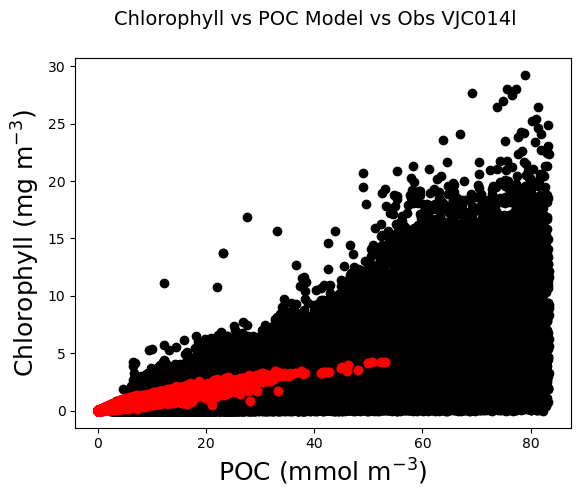

In [39]:
fig, ax = plt.subplots()
fig.suptitle('Chlorophyll vs POC Model vs Obs VJC014l', fontsize=14) # Change month in accordance with what 'im' is set to below

ax.scatter(obsPOC, obsCHL, color='Black')
ax.scatter(modPOC, modCHL, color='Red')

plt.xlabel("POC (mmol m$^{-3}$)", fontsize=18)
plt.ylabel("Chlorophyll (mg m$^{-3}$)", fontsize=18)



Text(0, 0.5, 'Chlorophyll (mg m$^{-3}$)')

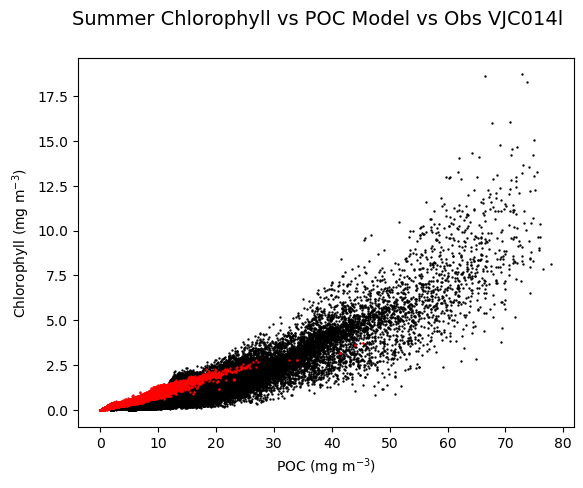

In [87]:
fig, ax = plt.subplots()
fig.suptitle('Summer Chlorophyll vs POC Model vs Obs VJC014l', fontsize=14) # Change month in accordance with what 'im' is set to below

ax.scatter(obsPOCs, obsCHLs, color='Black', s=0.5)
ax.scatter(modPOCs, modCHLs, color='Red', s=0.5)

plt.xlabel("POC (mg m$^{-3}$)", fontsize=10)
plt.ylabel("Chlorophyll (mg m$^{-3}$)", fontsize=10)



Text(0, 0.5, 'Chlorophyll (mg m$^{-3}$)')

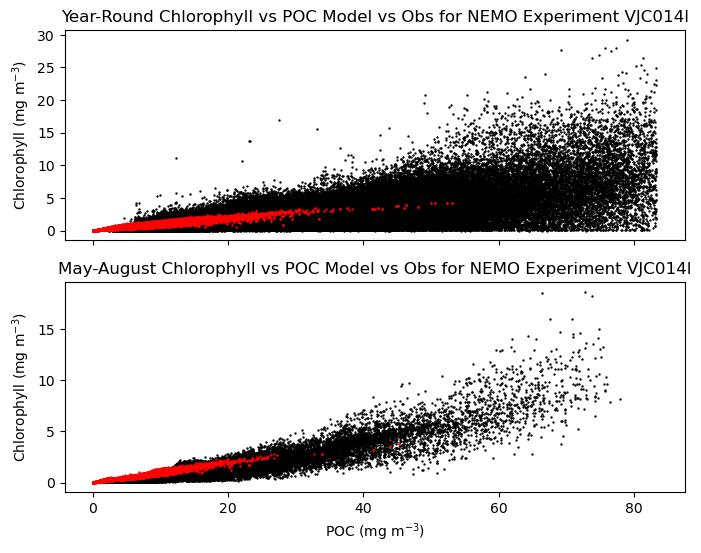

In [84]:
# This was run when I time averaged all four datasets from May-Sept

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(8, 6))

ax1.set_title('Year-Round Chlorophyll vs POC Model vs Obs for NEMO Experiment VJC014l')
ax2.set_title('May-August Chlorophyll vs POC Model vs Obs for NEMO Experiment VJC014l')

ax1.scatter(obsPOC, obsCHL, color='Black', s=0.5)
ax1.scatter(modPOC, modCHL, color='Red', s=0.5)

ax2.scatter(obsPOCs, obsCHLs, color='Black', s=0.5)
ax2.scatter(modPOCs, modCHLs, color='Red', s=0.5)



plt.xlabel("POC (mg m$^{-3}$)")
plt.ylabel("Chlorophyll (mg m$^{-3}$)")
ax1.set_ylabel("Chlorophyll (mg m$^{-3}$)")

(3880800,)
(388080,)
(227473,) (126810,)


ValueError: x and y must be the same size

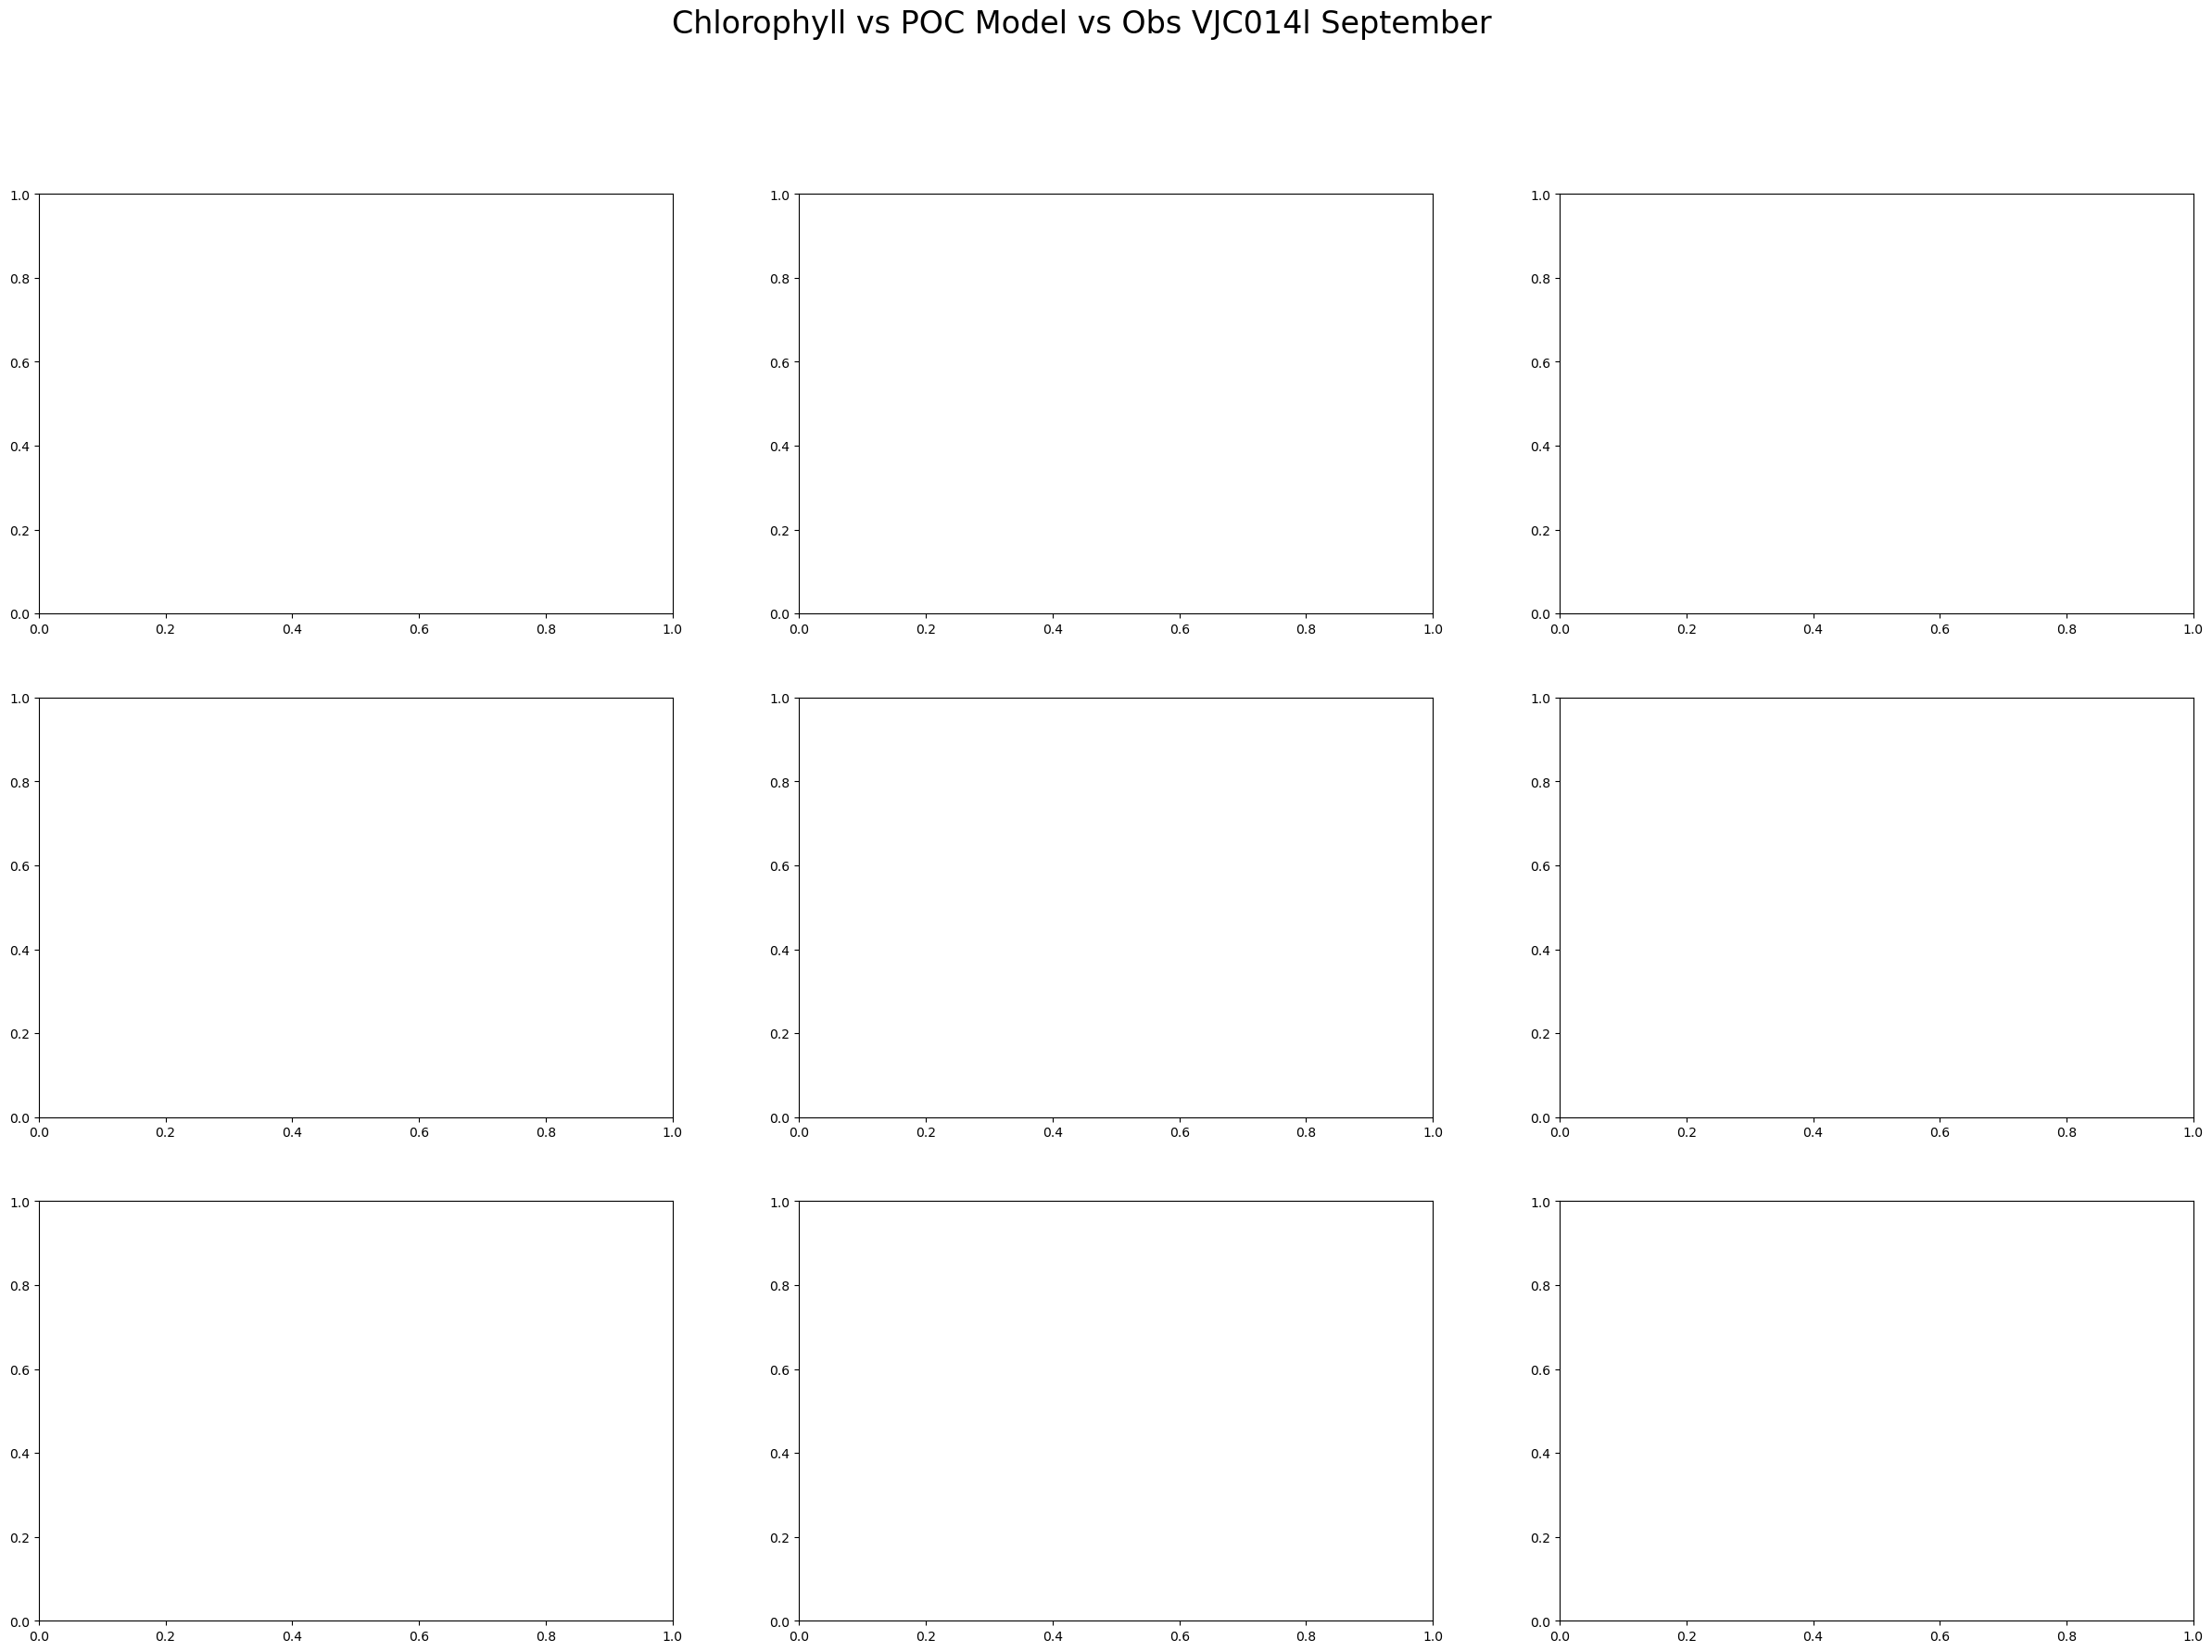

In [74]:
iz = np.arange(10)

months=['May','June','July','August','September']
#months=['January','February','March','April','May','June','July','August','September','October','November','December']
regions = ['Eastern Subarctic Pacific', 'Western Subarctic Pacific', 'Bering Sea', 'Beaufort Sea', 'Chukchi Sea', 'Baffin Bay (north)', 'Labrador Sea / Davis Strait', 'Atlantic/Arctic Transition', 'North Atlantic']

   
    
for i, c in enumerate(regions):    
    fig, axes = plt.subplots(num=1, clear=True, nrows=3, ncols=3, figsize=(30, 20))
    fig.suptitle('Chlorophyll vs POC Model vs Obs VJC014l '+mmon, fontsize=24) # Change month in accordance with what 'im' is set to below

        
    cx=plt.subplot(3,3,i+1)
    tmaskz=tmask[iz,:,:].flatten()
    ZZ=(np.zeros((10,ny,nx))+regindx).flatten()    # broadcast regions map into a 3D array with same data for each depth
    print(np.shape(ZZ))
    XOBS_POCs=obsPOCs[:,:].squeeze().flatten()
    print(np.shape(XOBS_POCs))
    XOBS_CHLs=obsCHLs[:,:].squeeze().flatten()
    XMOD_POCs=modPOCs[:,:].squeeze().flatten()
    XMOD_CHLs=modCHLs[:,:].squeeze().flatten()

    ii_POCs=np.where( ~np.isnan(XOBS_POCs) )[0]
    XOBS_POCs=XOBS_POCs[ii_POCs]; XMOD_POCs=XMOD_POCs[ii_POCs]; ZZ_POCs=ZZ[ii_POCs]; tmaskz_POCs=tmaskz[ii_POCs];
    jj_POCs=np.where( (XOBS_POCs>0.) & (ZZ_POCs==(i+1)) & (tmaskz_POCs==1) )[0]

    ii_CHLs=np.where( ~np.isnan(XOBS_CHLs) )[0]
    XOBS_CHLs=XOBS_CHLs[ii_CHLs]; XMOD_CHLs=XMOD_CHLs[ii_CHLs]; ZZ_CHLs=ZZ[ii_CHLs]; tmaskz_CHLs=tmaskz[ii_CHLs];
    jj_CHLs=np.where( (XOBS_CHLs>0.) & (ZZ_CHLs==(i+1)) & (tmaskz_CHLs==1) )[0]

    #cx.scatter(XOBS_POC[jj_POC], XMOD_POC[jj_POC], color='Black') #plots poc model in black
    #cx.scatter(XOBS_CHL[jj_CHL], XMOD_CHL[jj_CHL], color='Red') #plots chl model in red
    print(np.shape(XOBS_POCs), np.shape(XOBS_CHLs))
    cx.scatter(XOBS_POCs[jj_POCs], XOBS_CHLs[jj_CHLs], color='Black')
    cx.scatter(XMOD_POCs[jj_POCs], XMOD_CHLs[jj_CHLs], color='Red')

    #ax2.scatter(obsPOCs, obsCHLs, color='Black', s=0.5)
    #ax2.scatter(modPOCs, modCHLs, color='Red', s=0.5)


    #if i > 5:
    plt.xlabel("POC", fontsize=18)
    plt.ylabel("CHL", fontsize=18)
    plt.title(c, fontsize=18)
    cx.tick_params(axis='both', labelsize=16)
    cx.set_aspect(1./cx.get_data_ratio())
    
plt.show()

/tmp/ipykernel_169924/106401874.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPOC = dataPOC.variables['tPOC'][:]
/tmp/ipykernel_169924/106401874.py:46: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modCHL = dataCHL.variables['tCHL'][:]


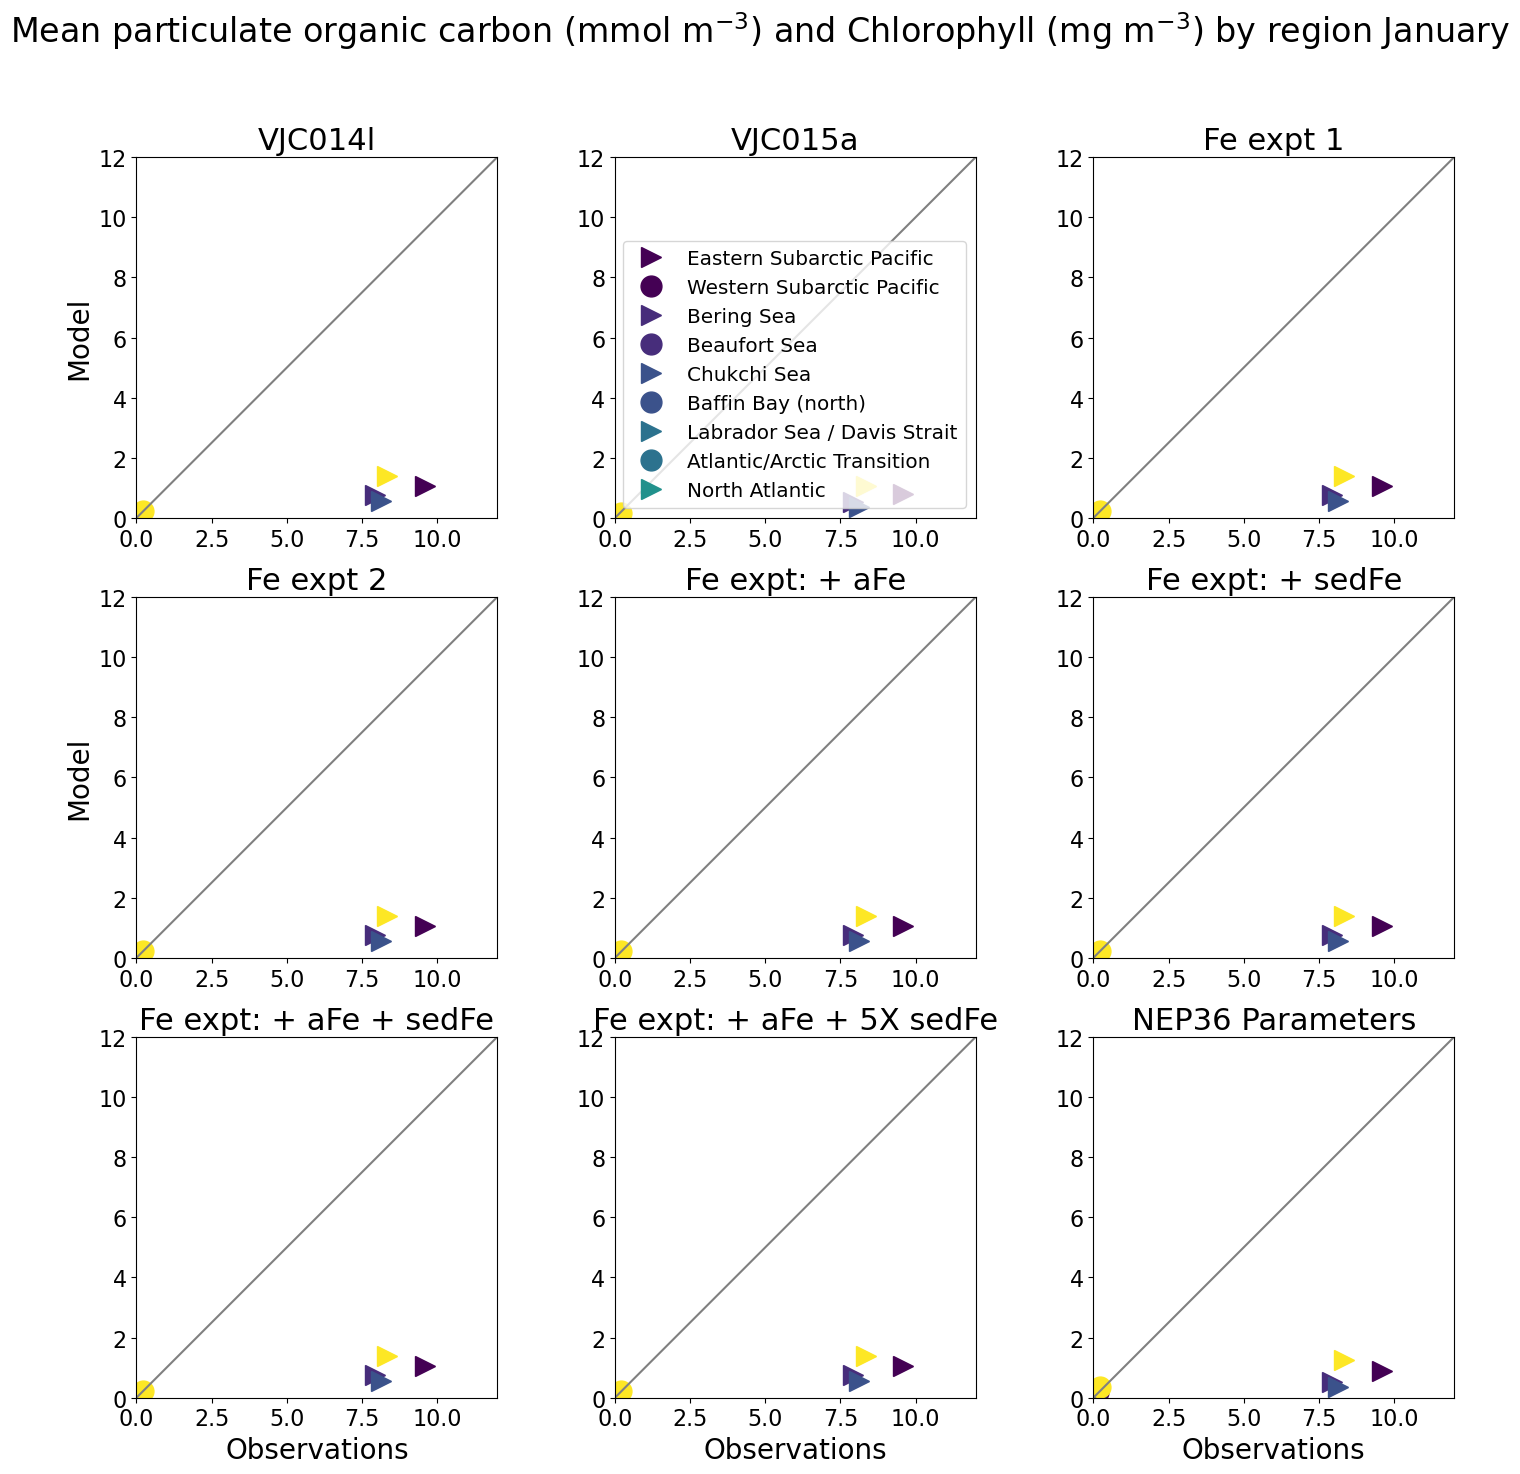

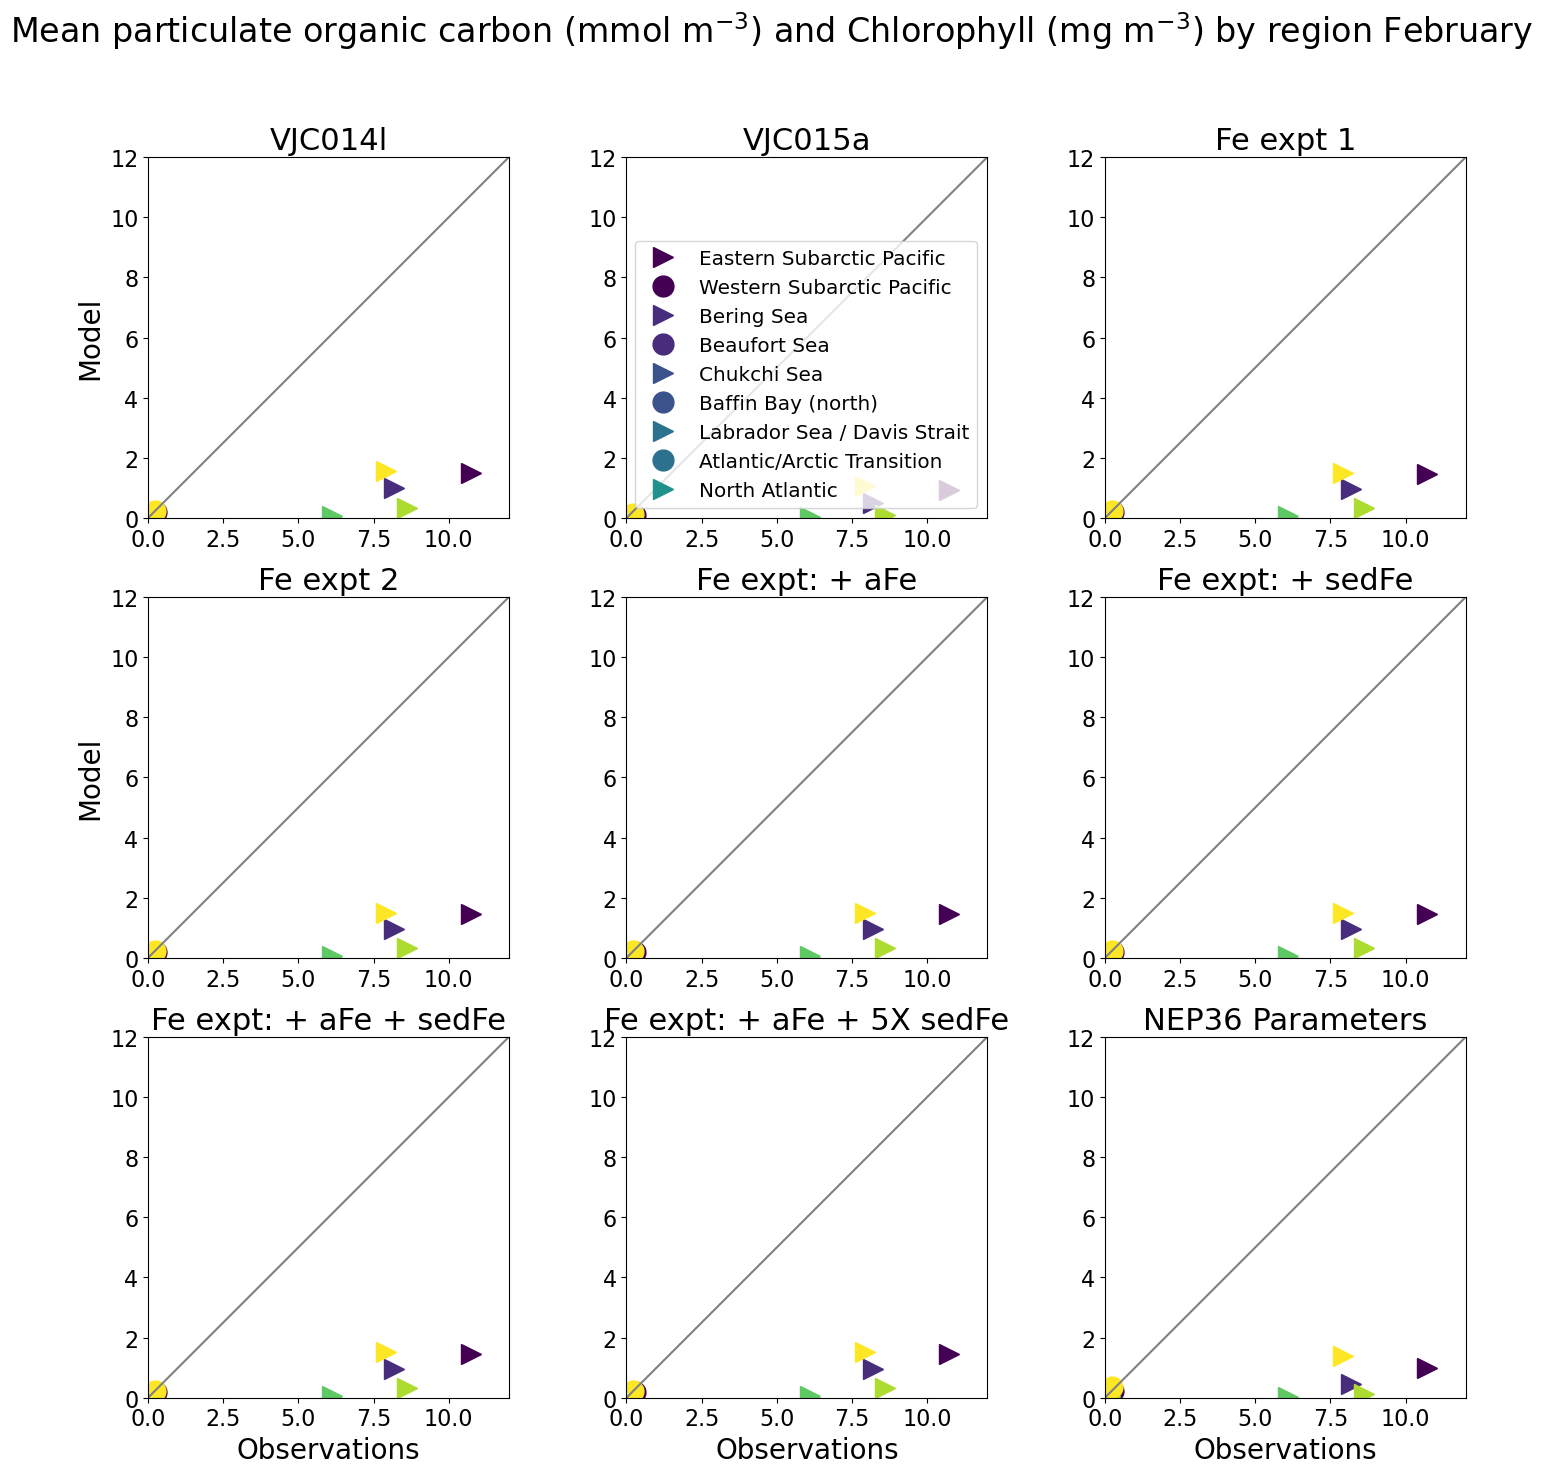

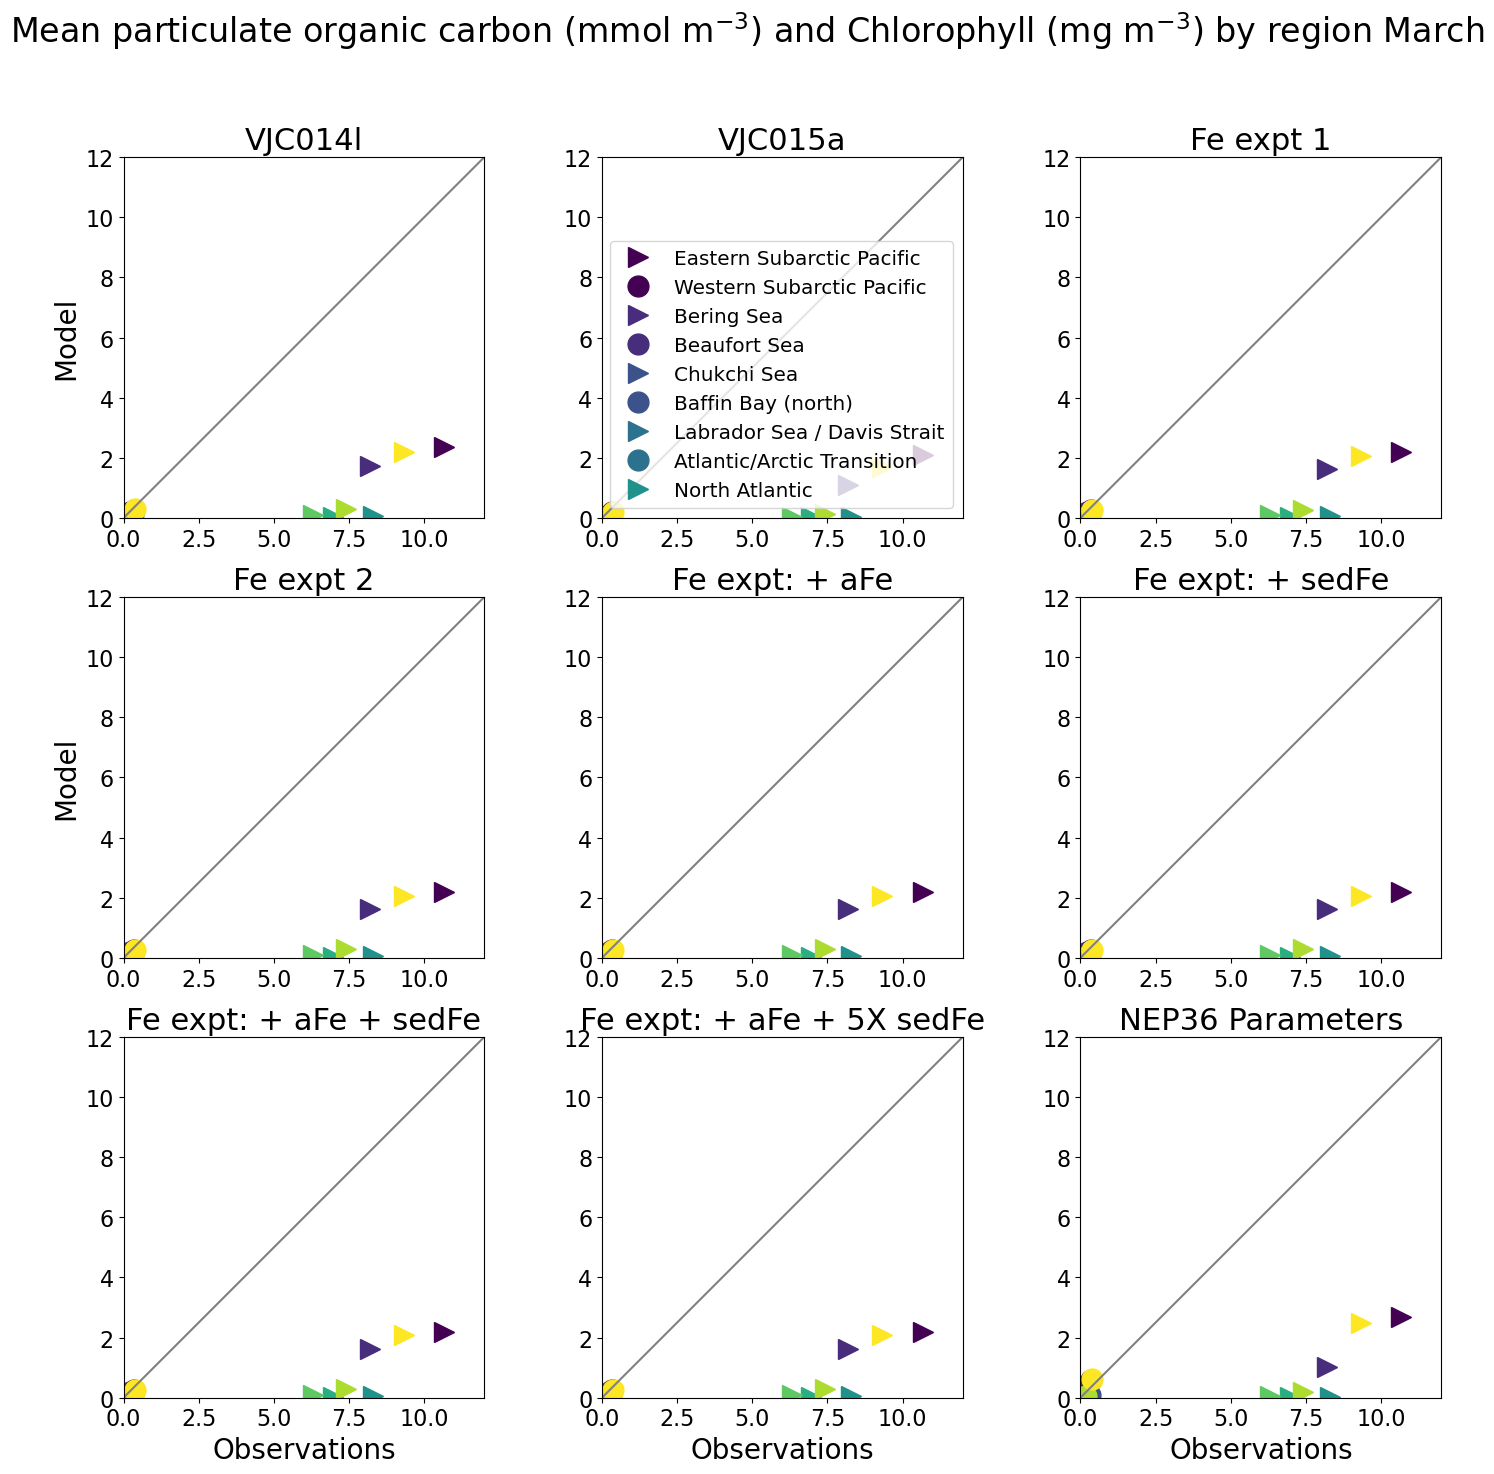

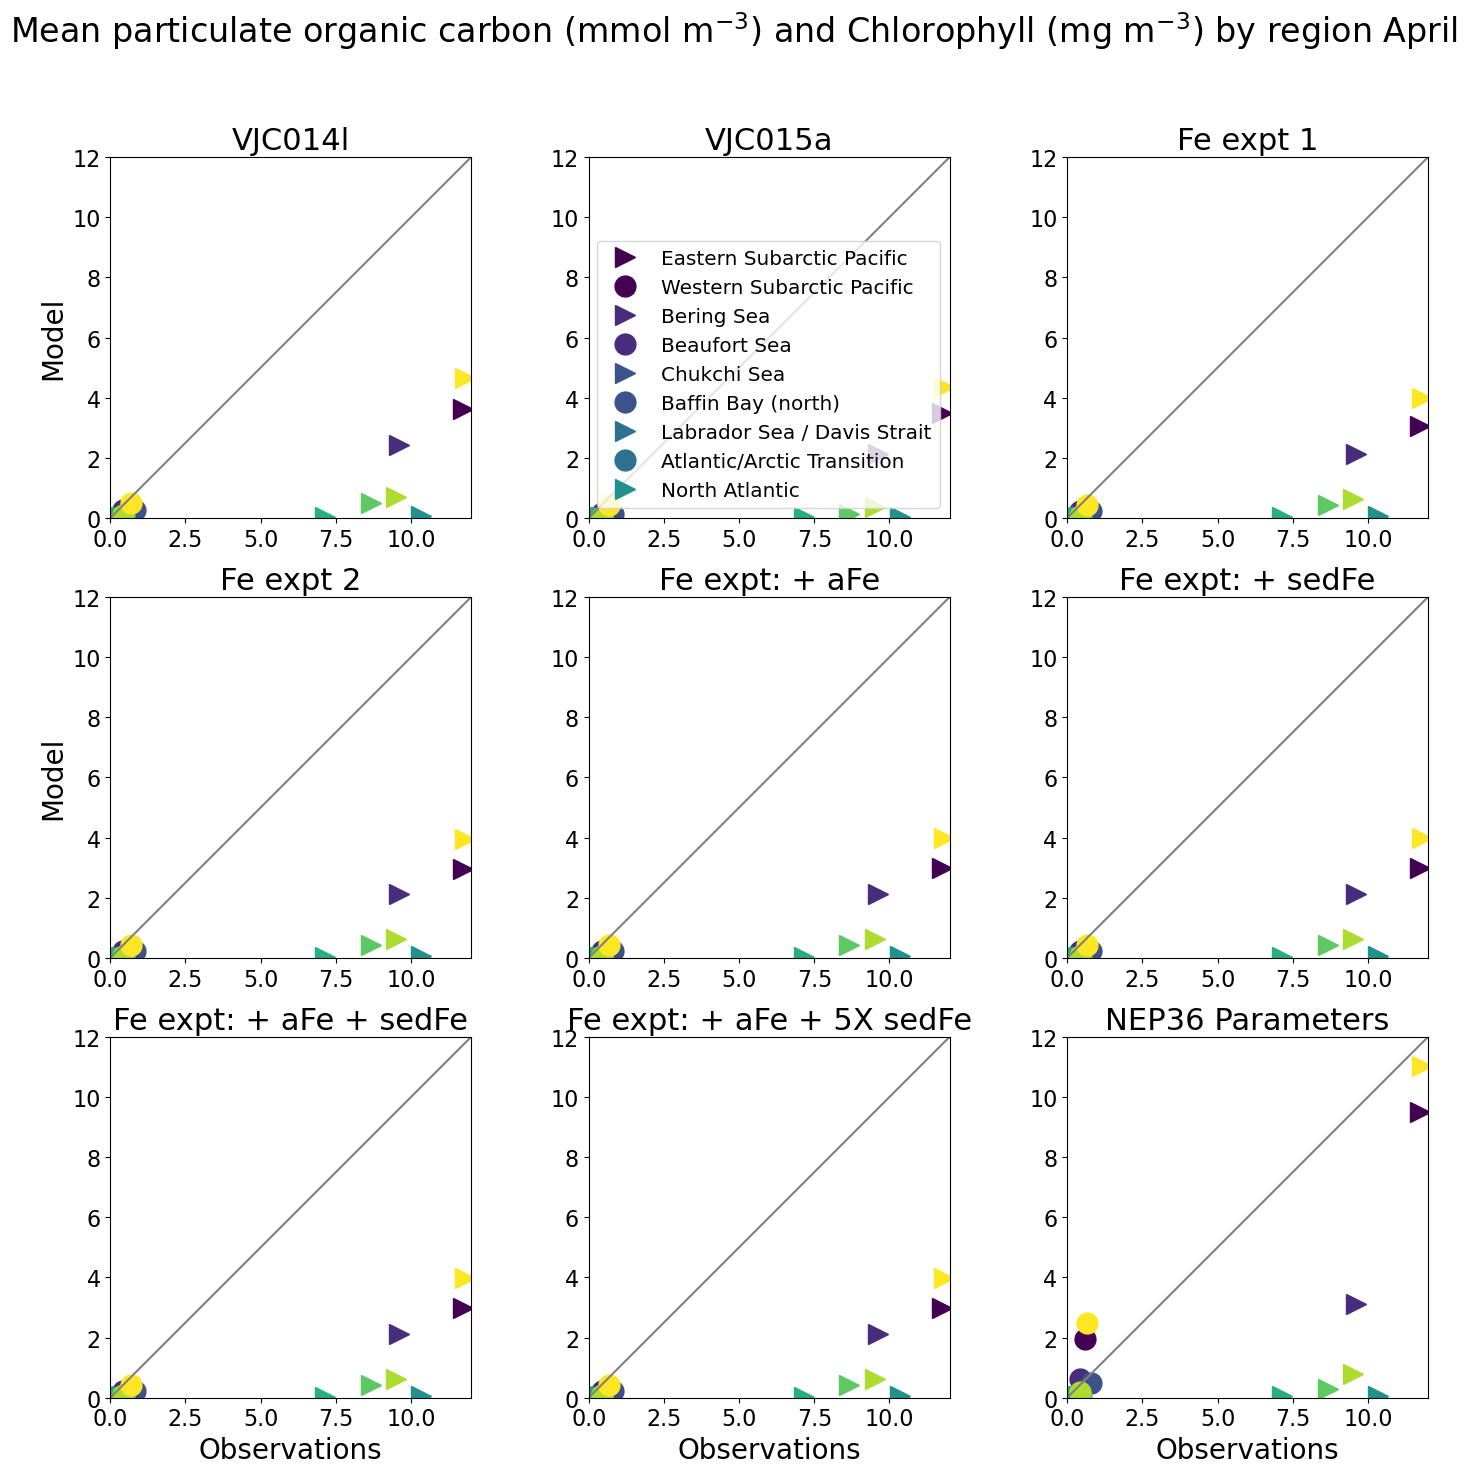

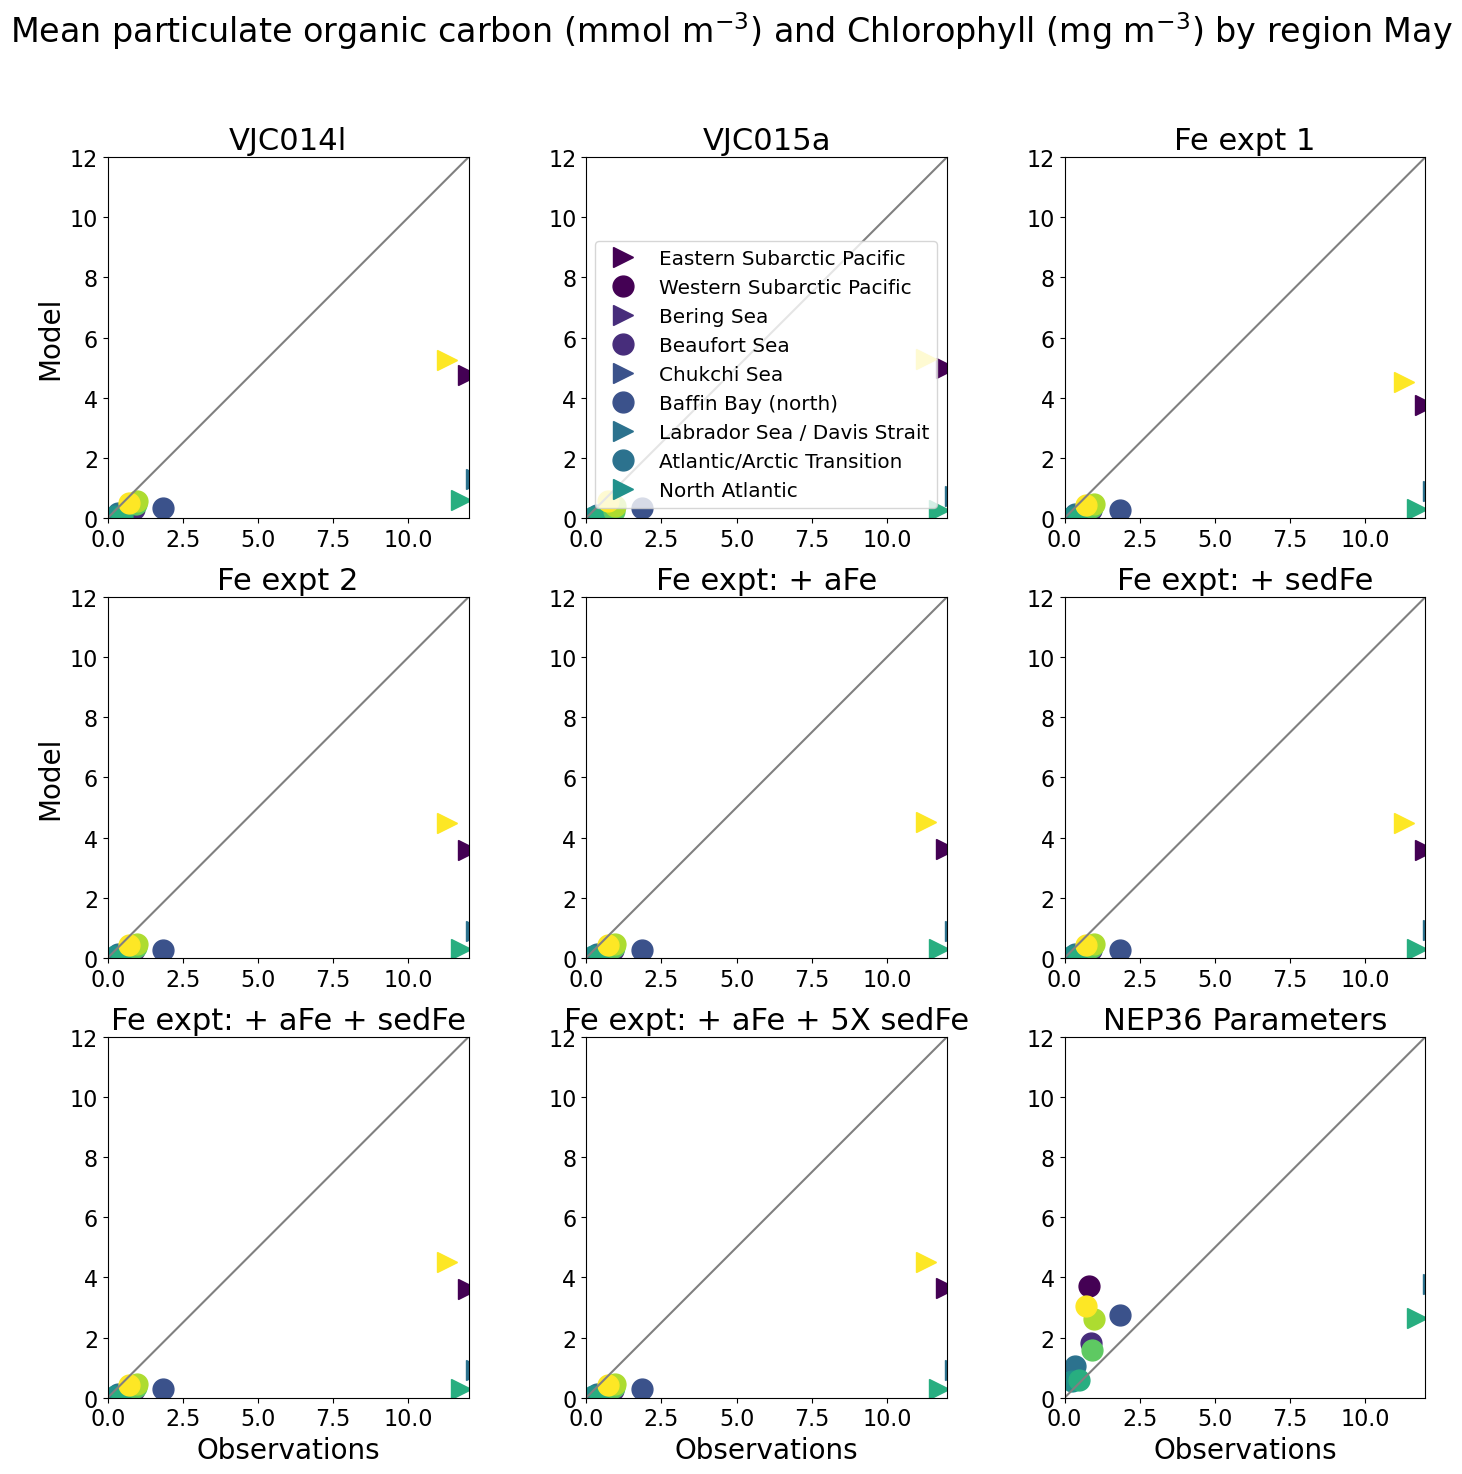

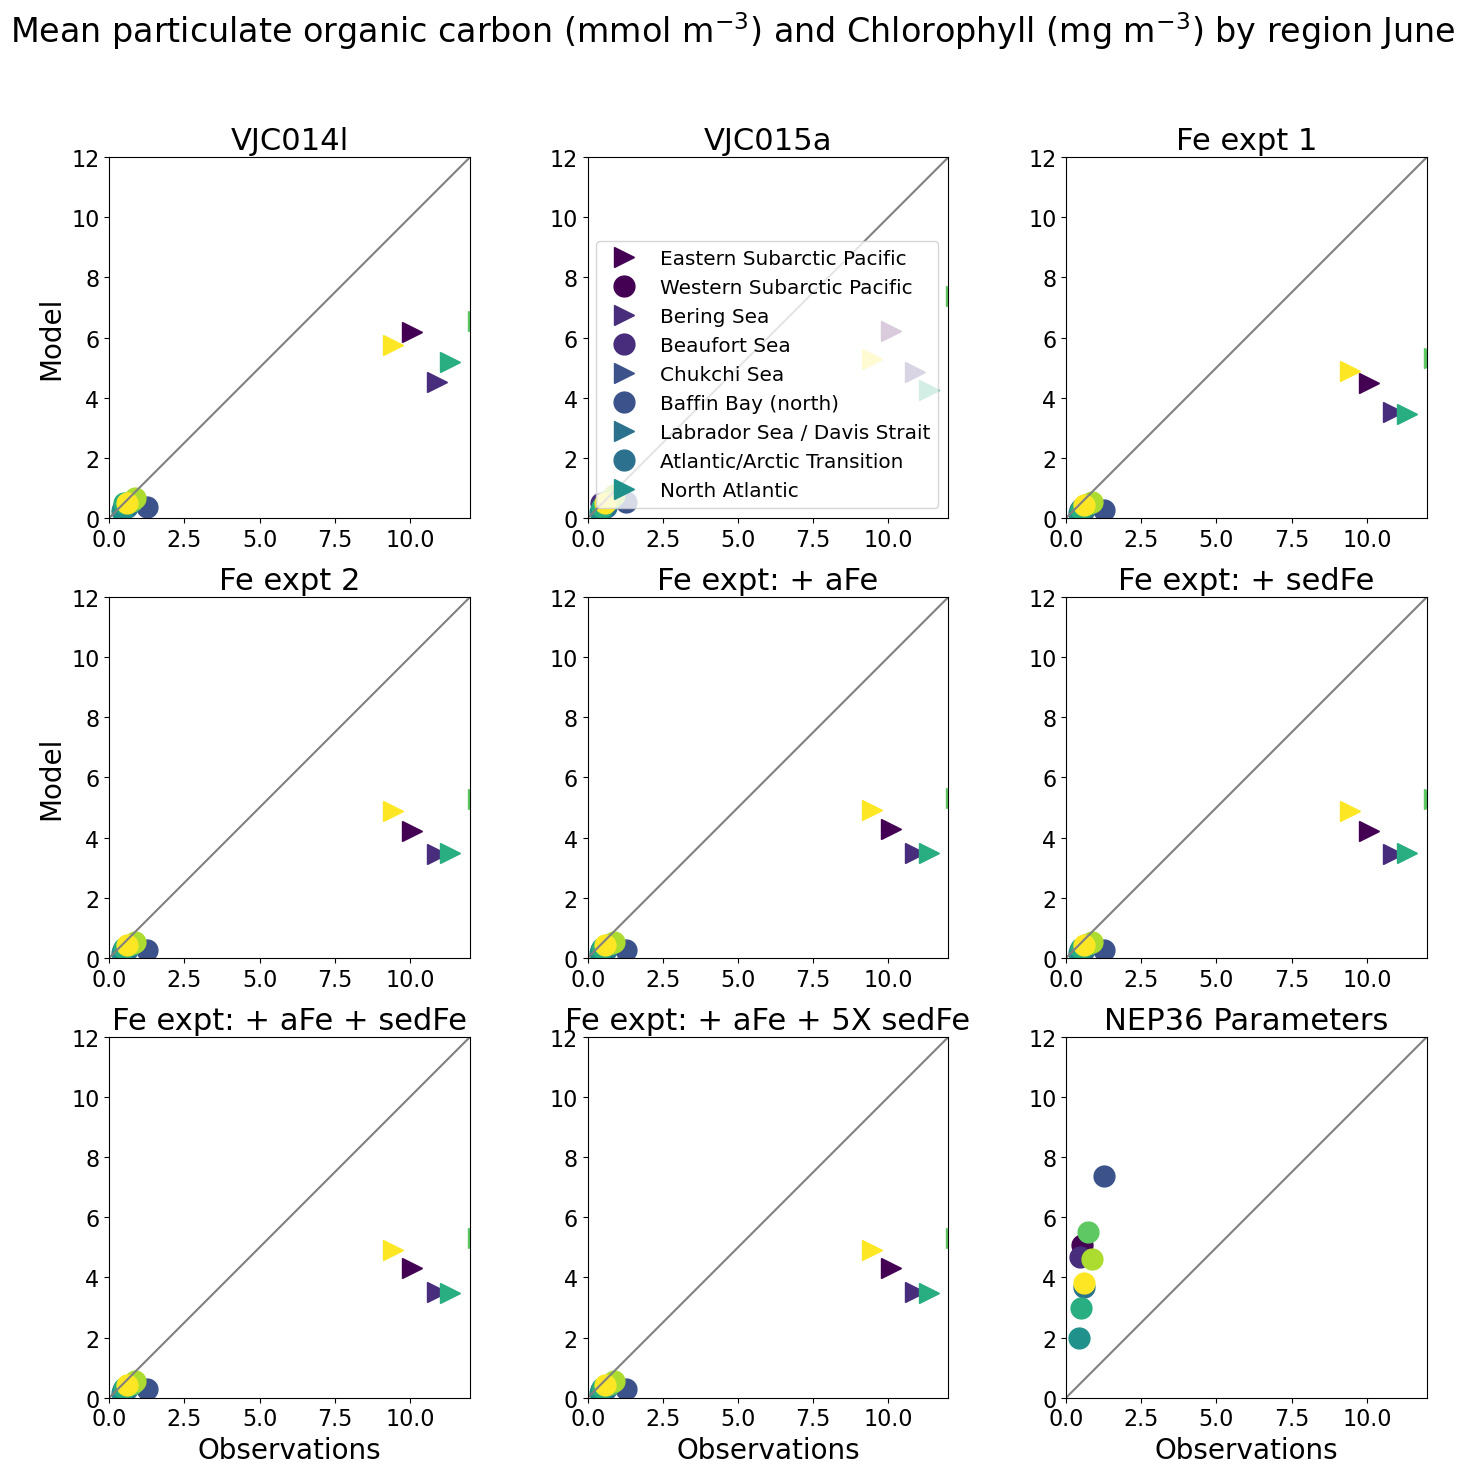

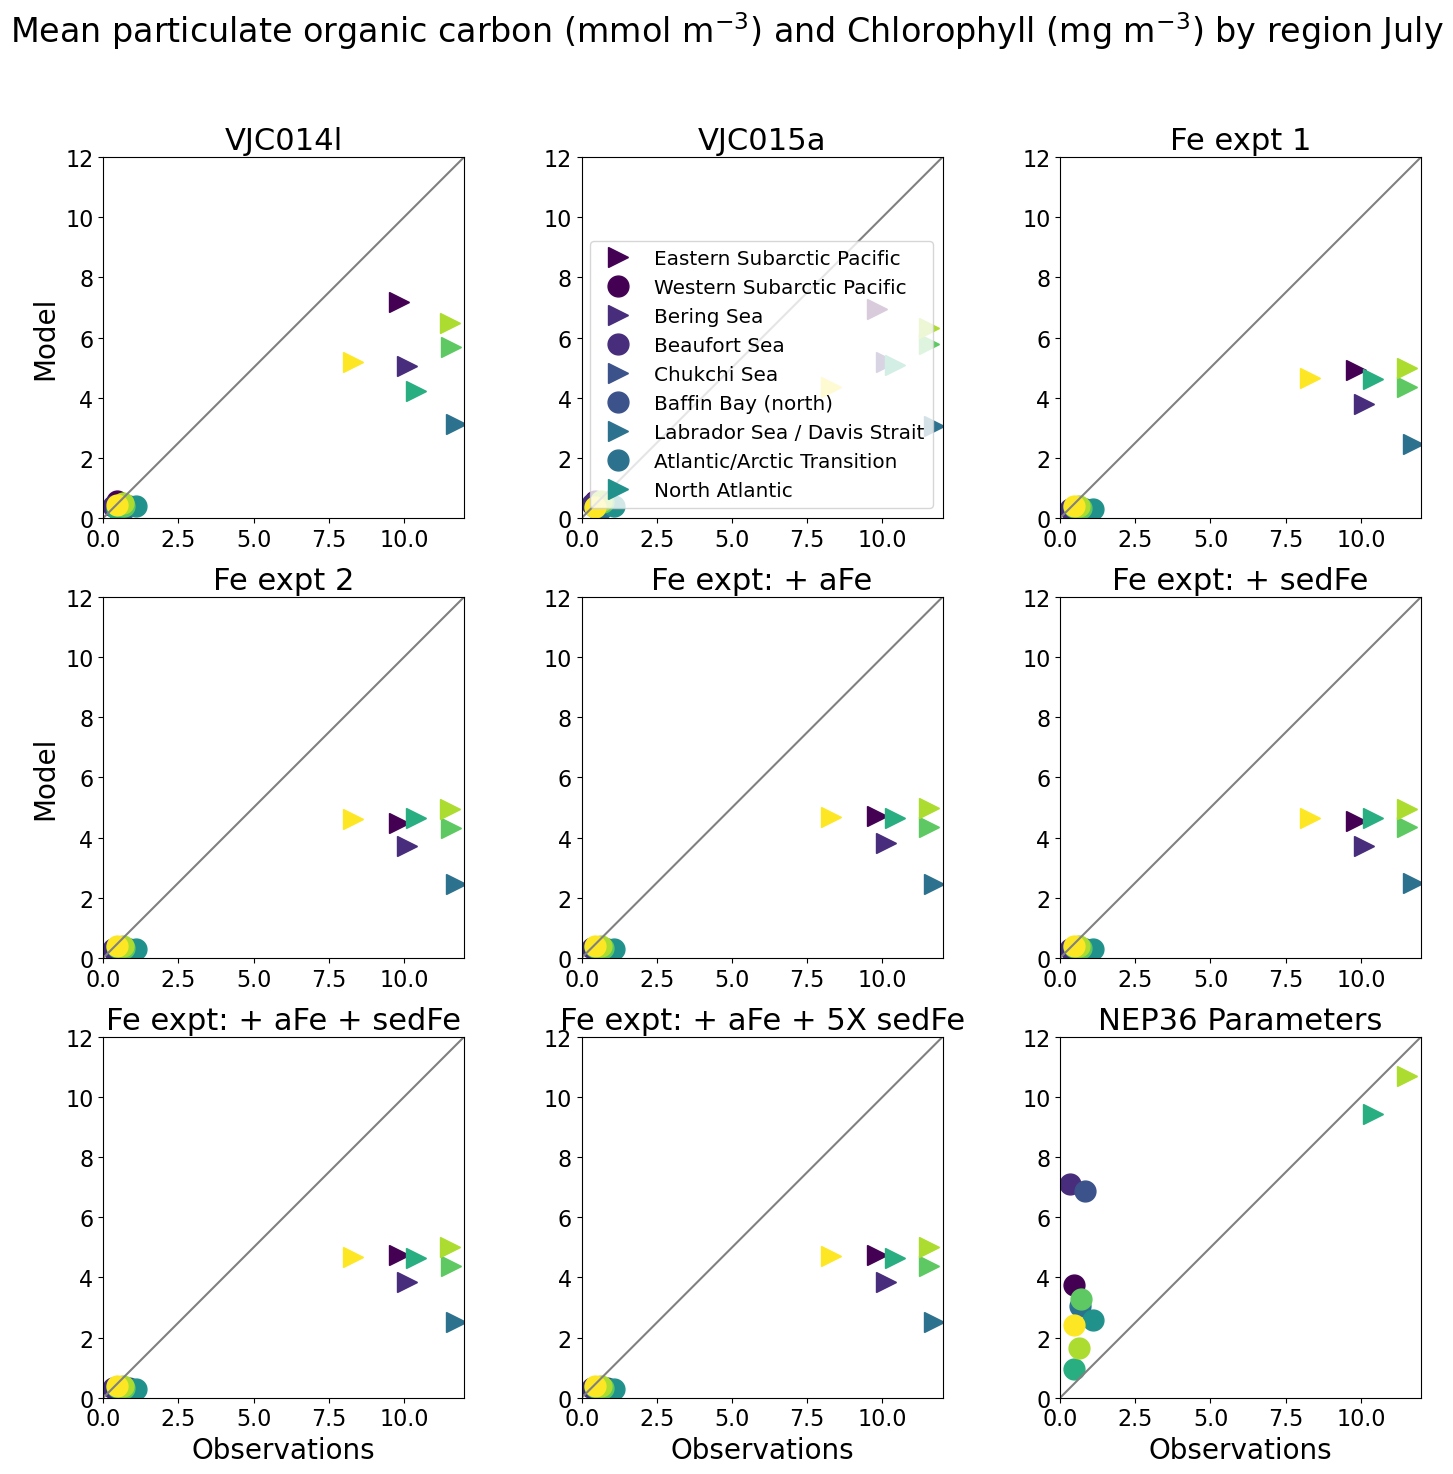

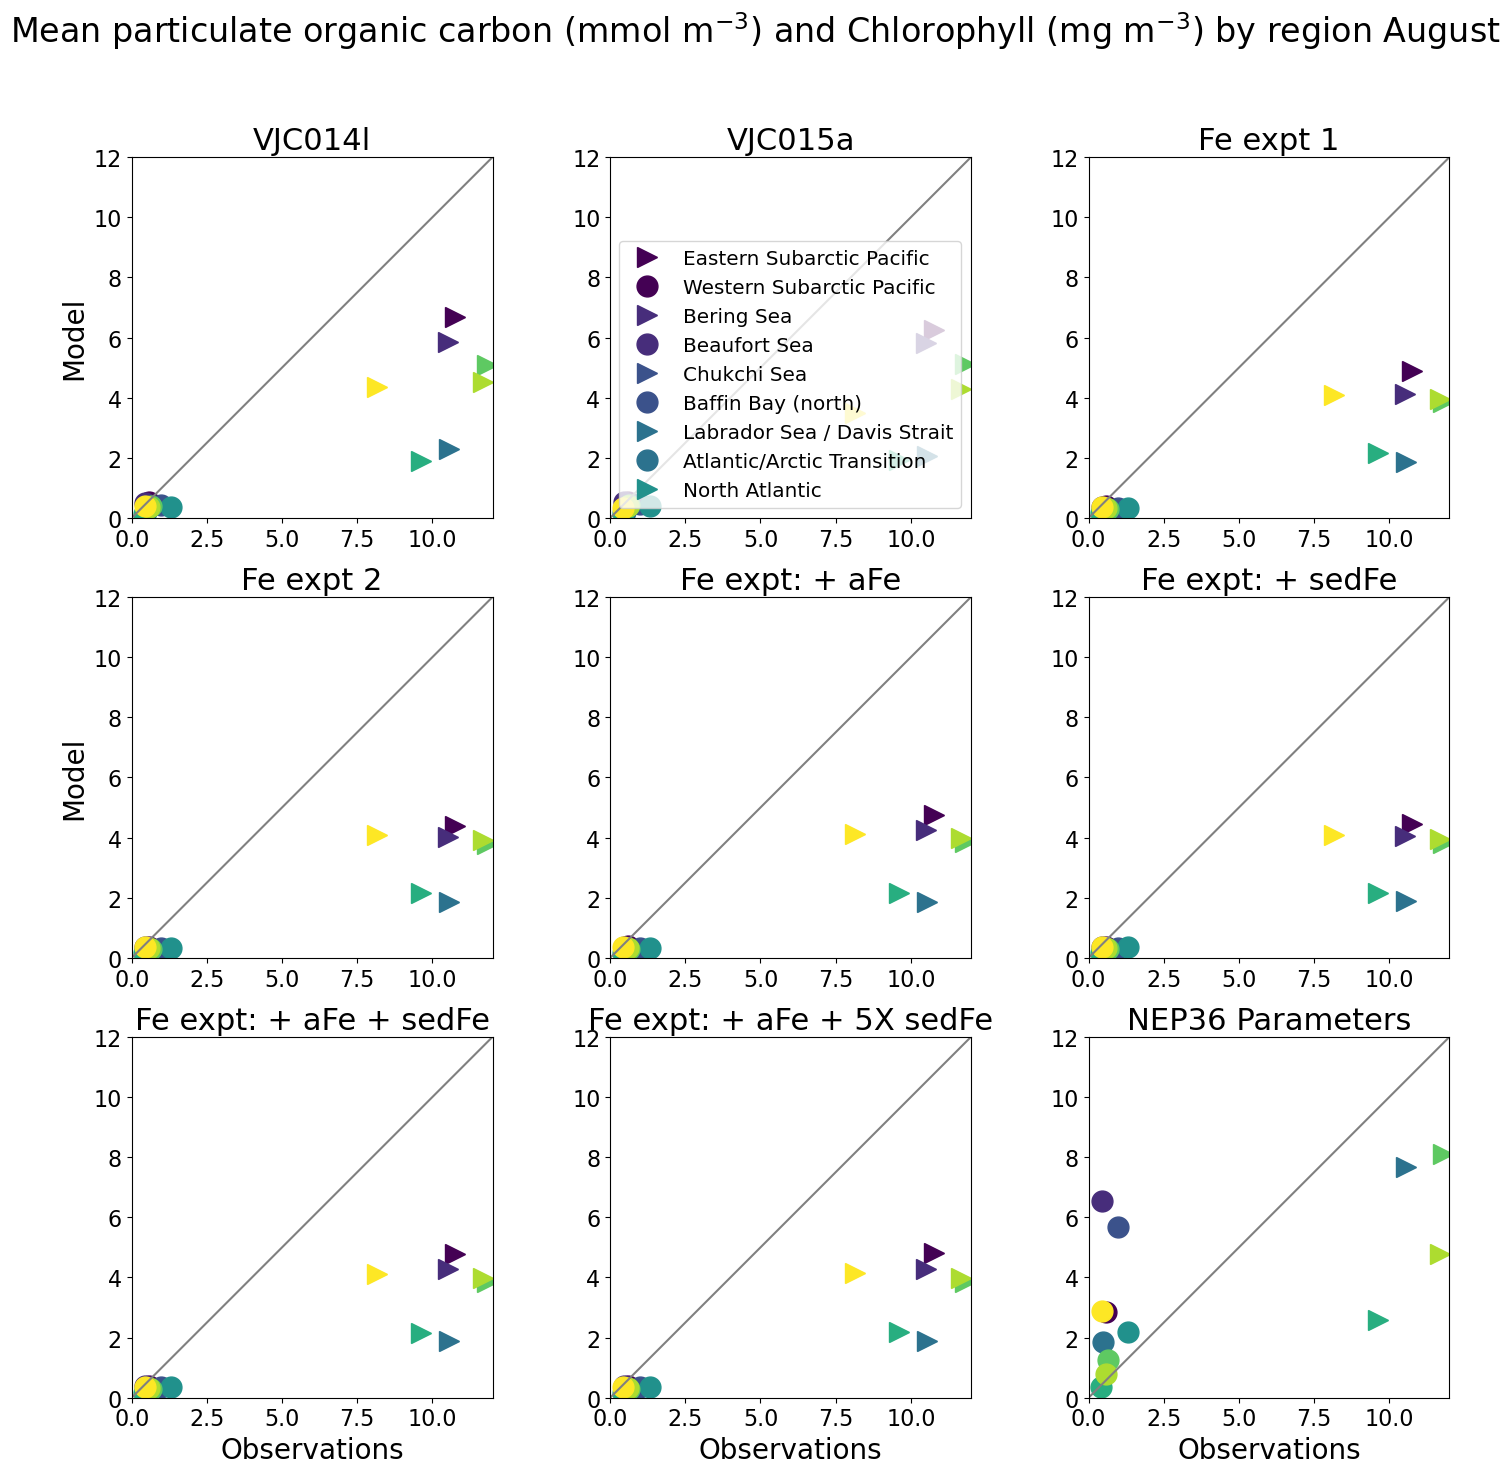

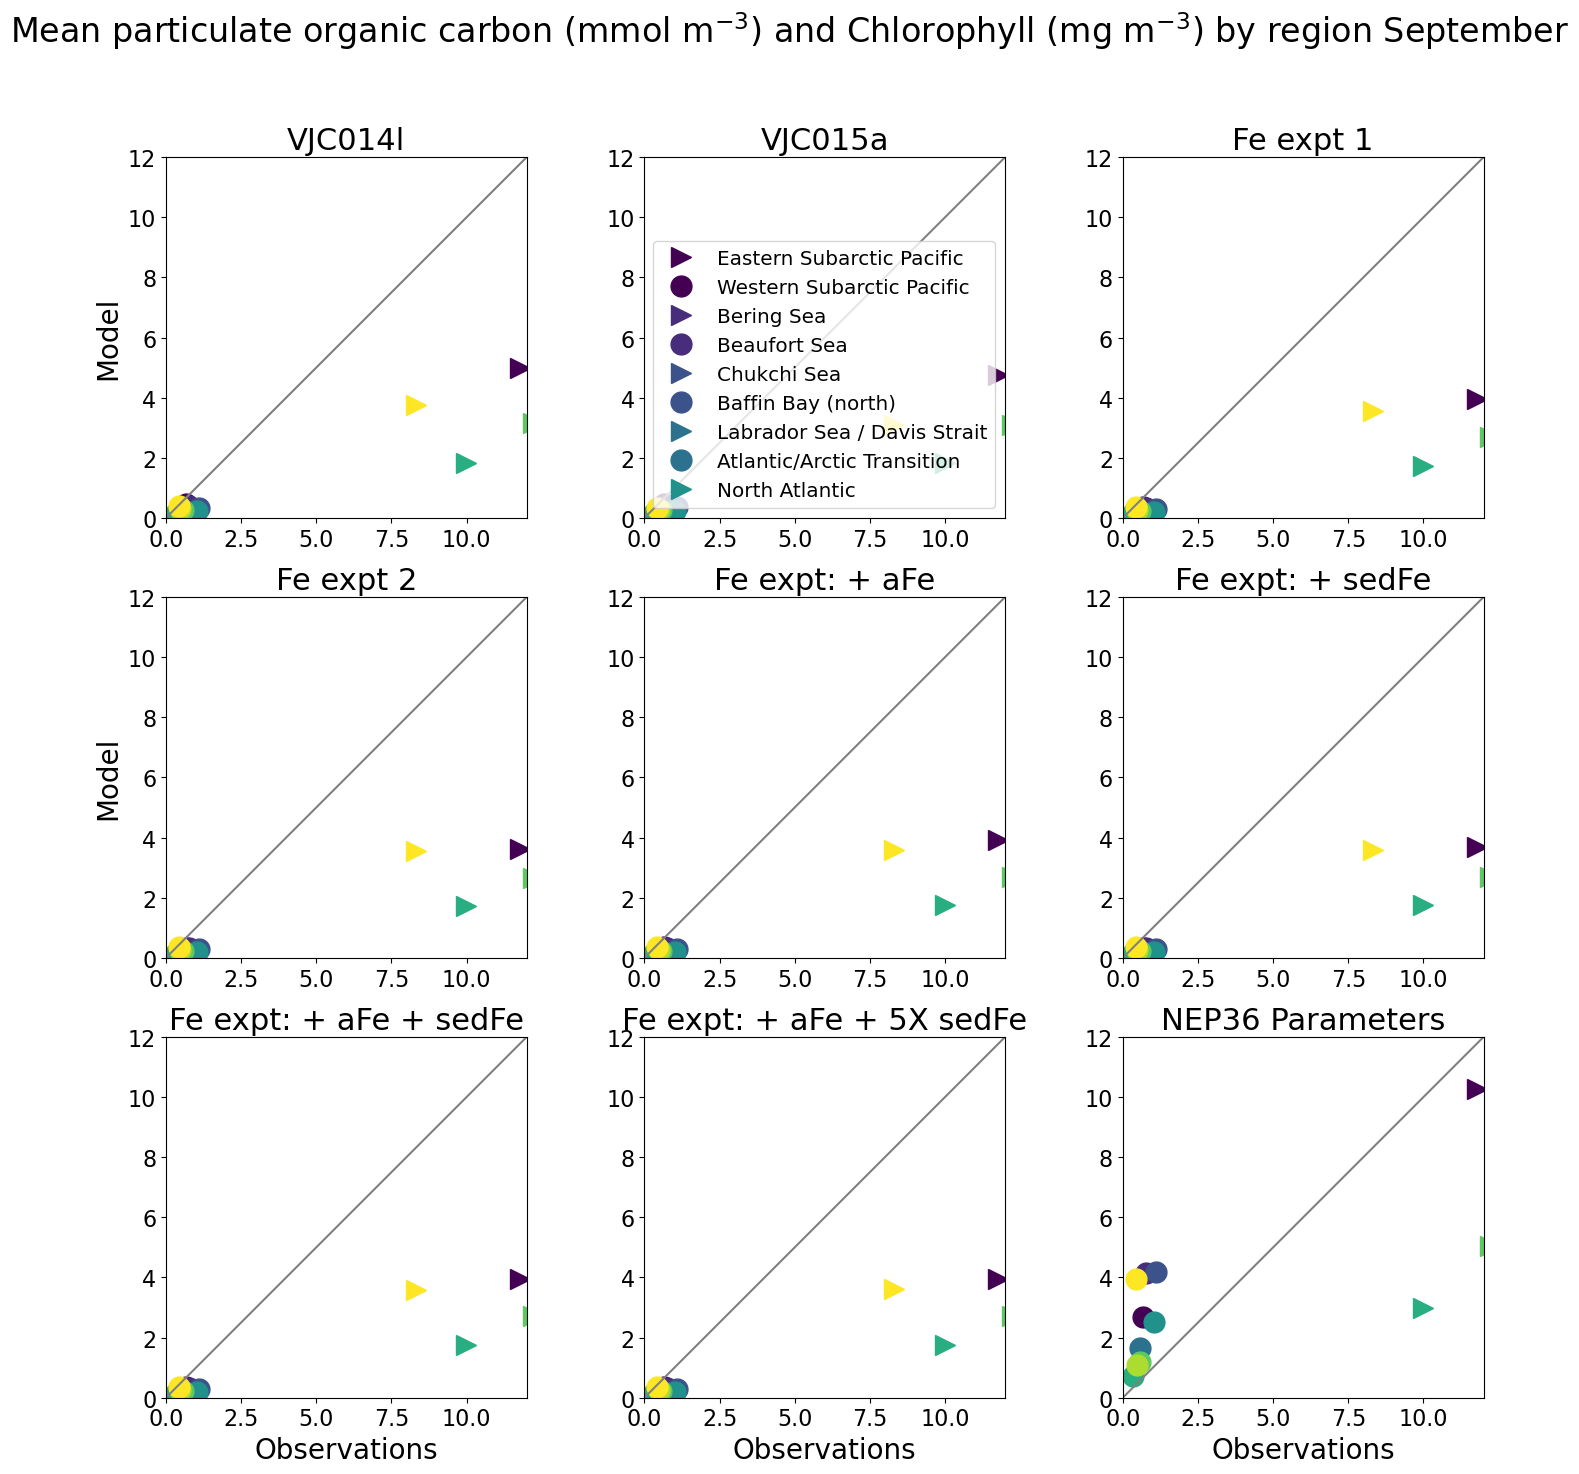

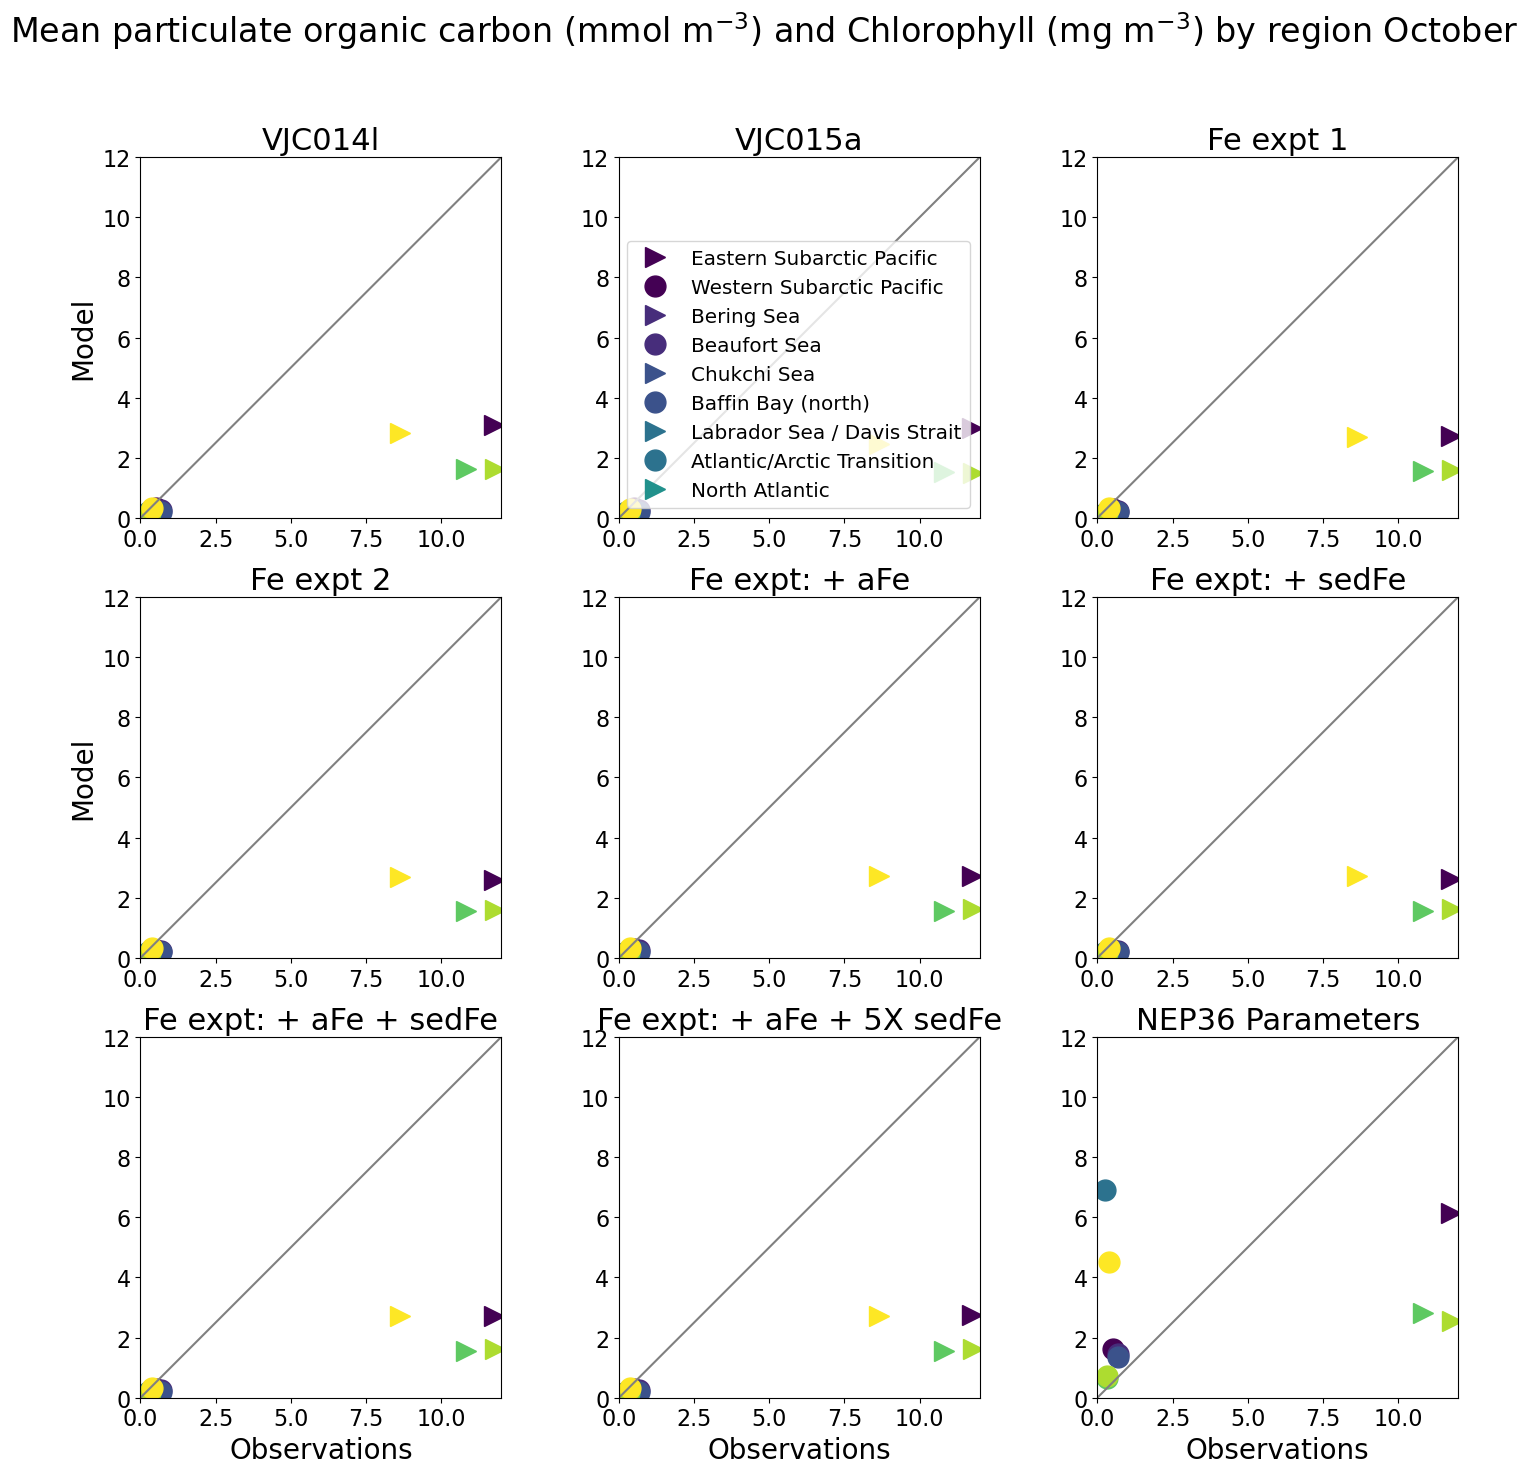

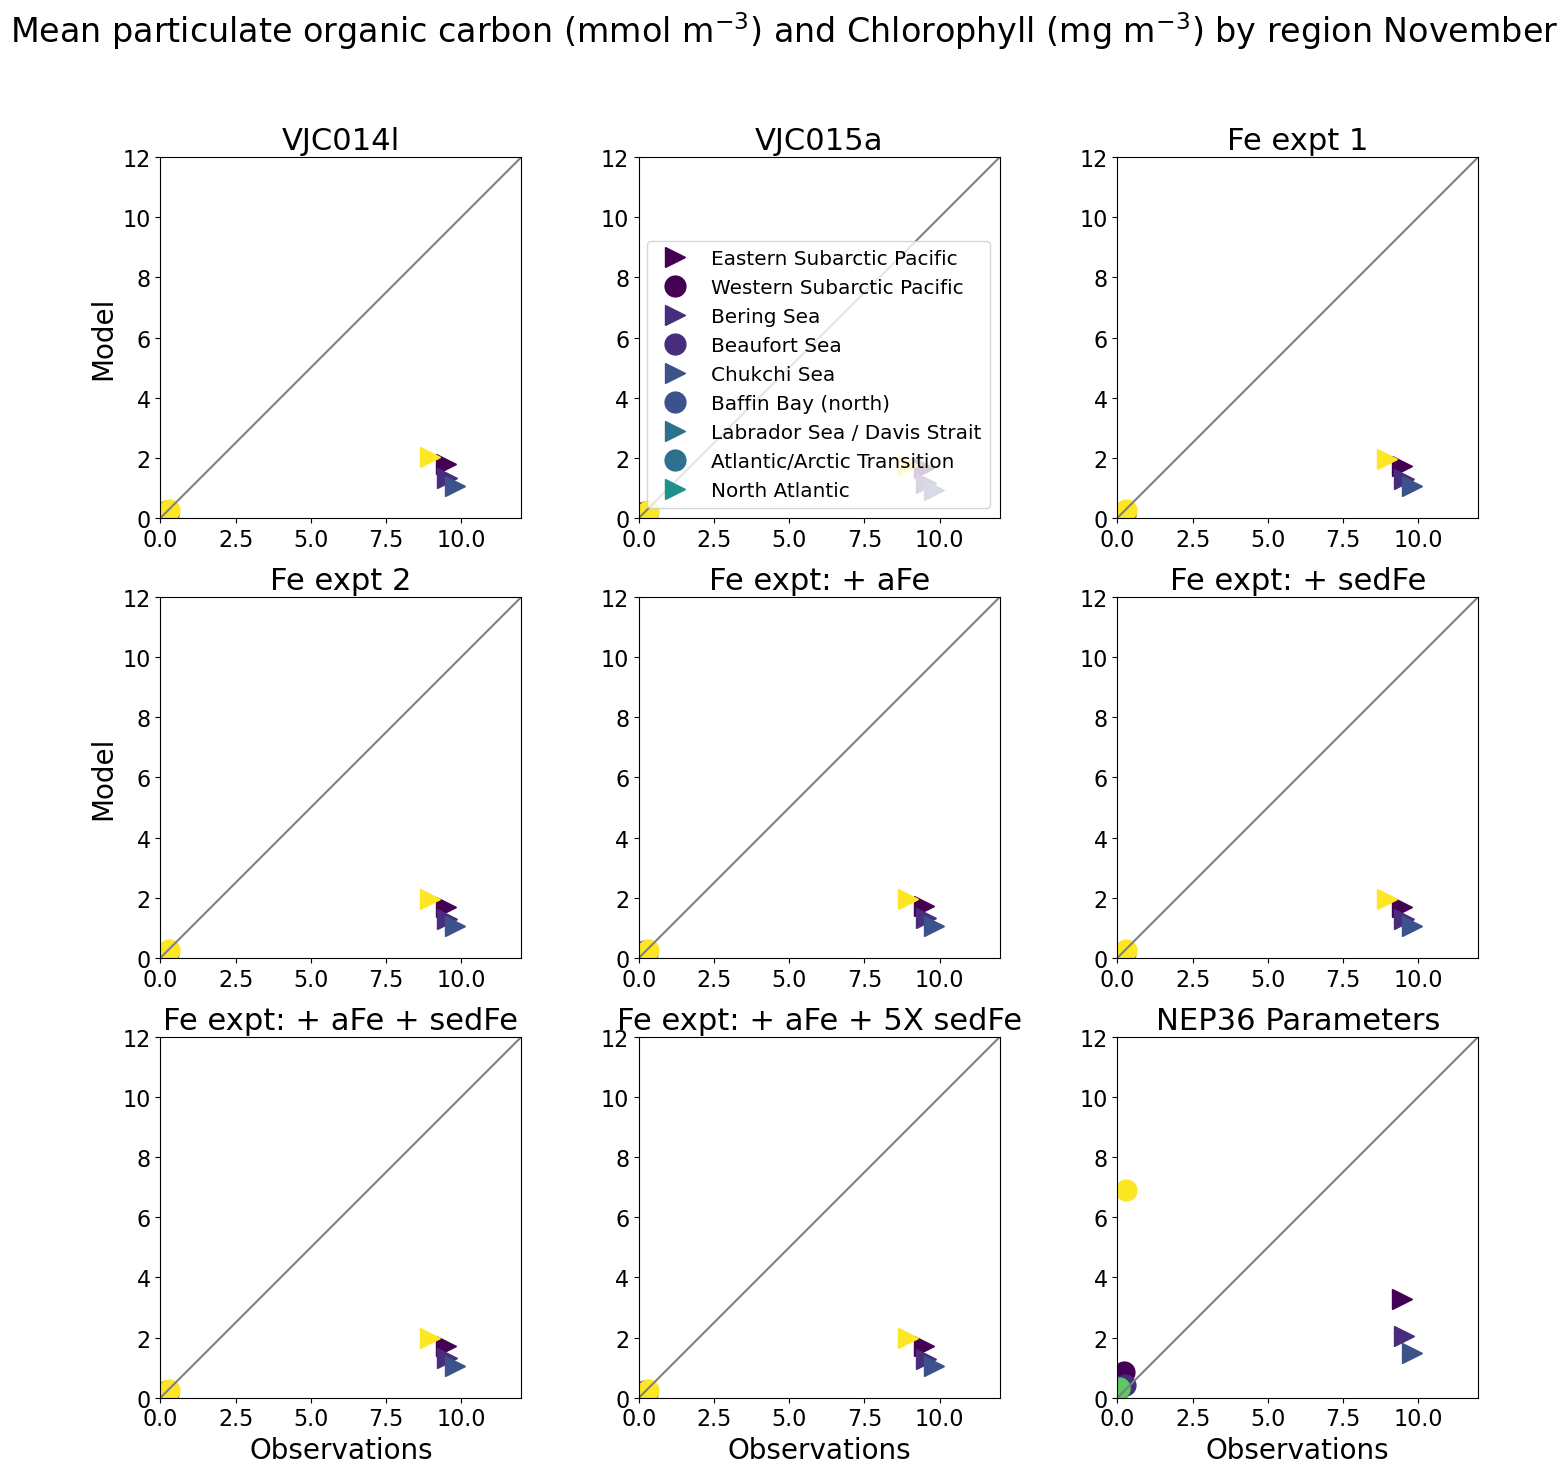

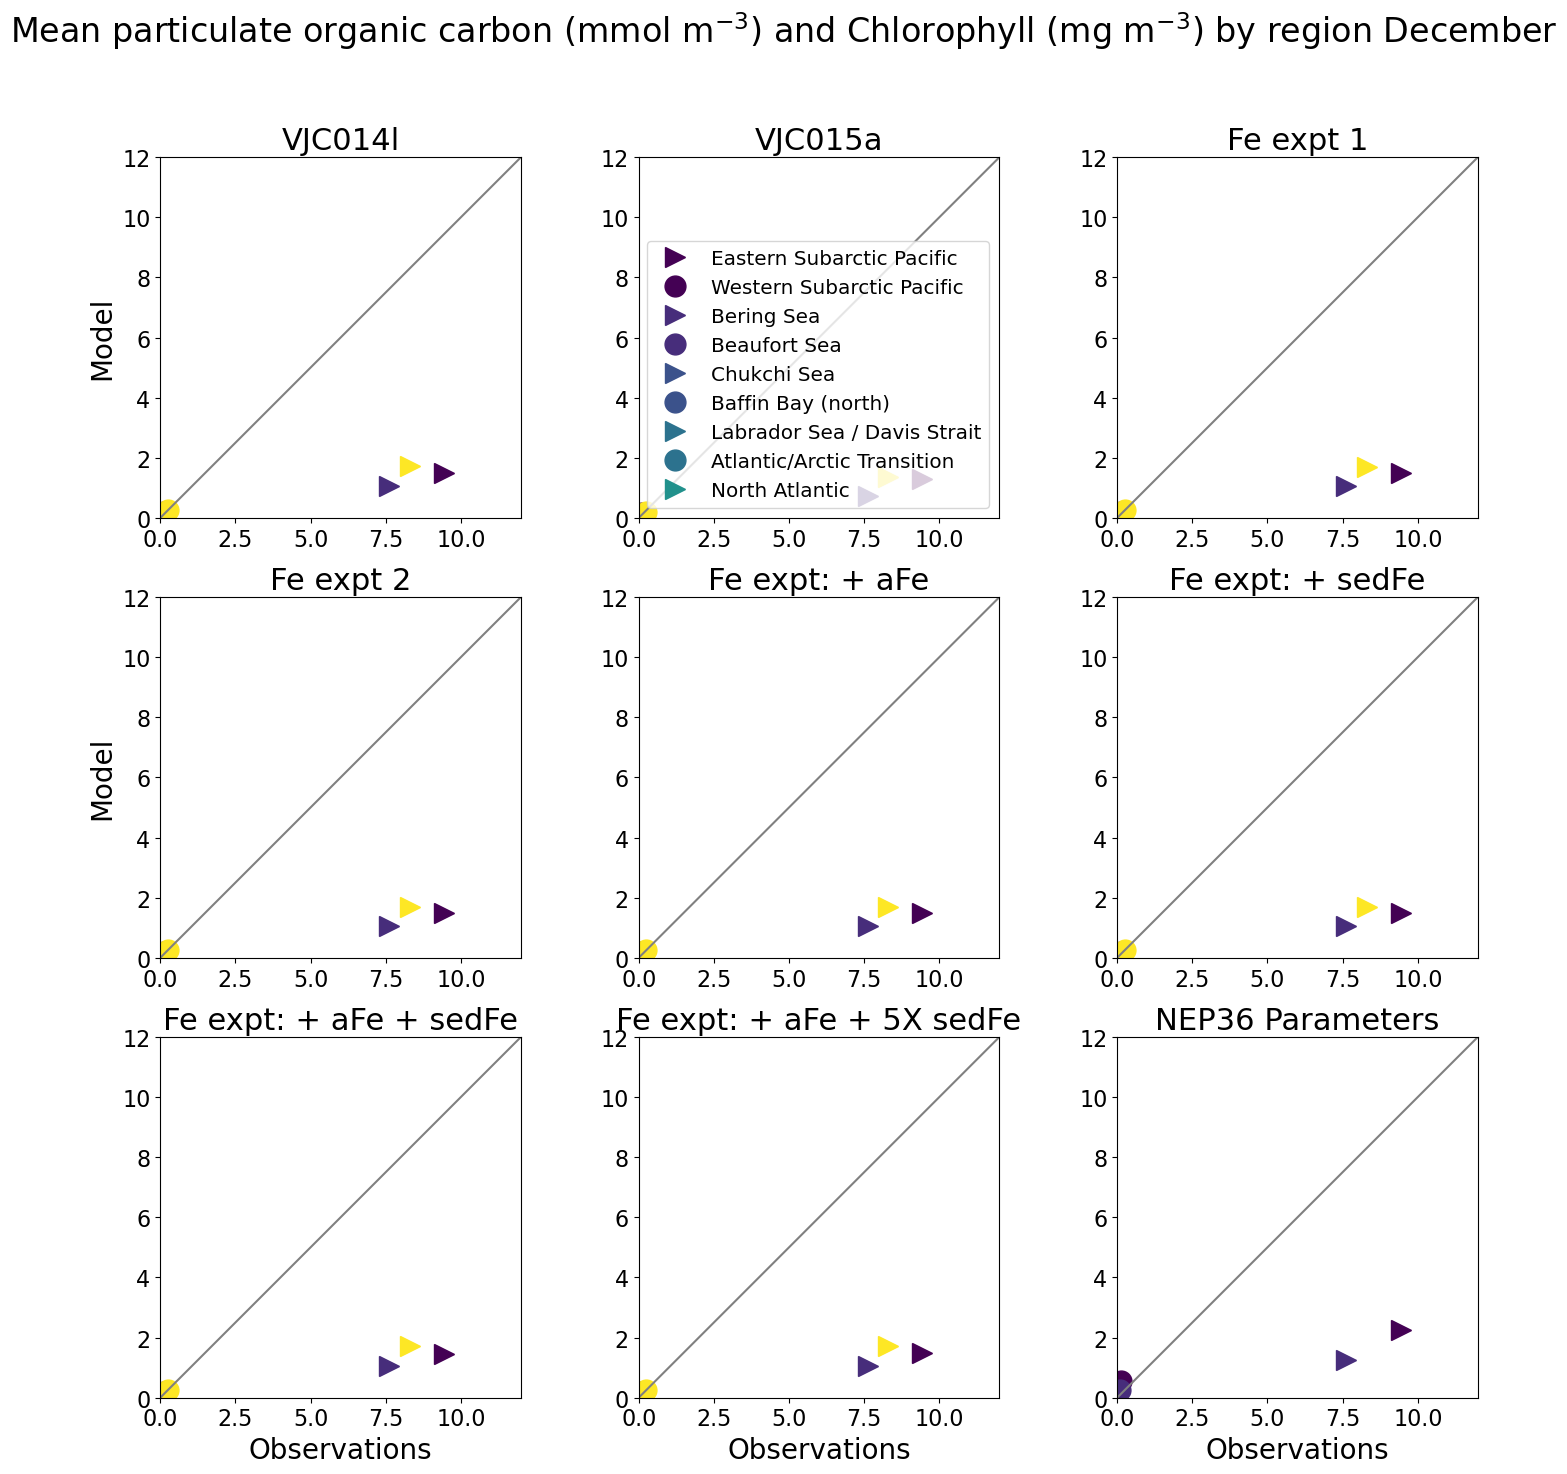

In [29]:
# Presentation quality plot for BioMod Workshop

regions = ['Eastern Subarctic Pacific', 'Western Subarctic Pacific', 'Bering Sea', 'Beaufort Sea', 'Chukchi Sea', 'Baffin Bay (north)', 'Labrador Sea / Davis Strait', 'Atlantic/Arctic Transition', 'North Atlantic']
import itertools
iz = np.arange(10)

months=['January','February','March','April','May','June','July','August','September','October','November','December']
regions = ['Eastern Subarctic Pacific', 'Western Subarctic Pacific', 'Bering Sea', 'Beaufort Sea', 'Chukchi Sea', 'Baffin Bay (north)', 'Labrador Sea / Davis Strait', 'Atlantic/Arctic Transition', 'North Atlantic']
variants = ['-VJC014l','-VJC015a','-VJC015oi','-VJC015ol','-VJC015on','-VJC015or','-VJC015os','-VJC015ot','-VJCnep01']
variantdict = ['VJC014l','VJC015a','Fe expt 1','Fe expt 2','Fe expt: + aFe','Fe expt: + sedFe','Fe expt: + aFe + sedFe',
               'Fe expt: + aFe + 5X sedFe','NEP36 Parameters']

for im, mmon in enumerate(months):
    
    fig, axes = plt.subplots(num=1, clear=True, nrows=3, ncols=3, figsize=(15, 15))
    fig.suptitle('Mean particulate organic carbon (mmol m$^{-3}$) and Chlorophyll (mg m$^{-3}$) by region '+mmon, fontsize=24) 
    #fig.suptitle('Particulate organic carbon concentration (mmol m$^{-3}$) and Chlorophyll (mg m$^{-3}$) by region '+mmon, fontsize=24) 

    for a, asuff in enumerate(variants):
        cx=plt.subplot(3,3, a+1)
        runid = str('CREG025_LIM3_CANOE'+asuff)
        data_all=np.zeros((12,ny,nx))
        
        flistPOC = glob.glob("/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/POC/"+runid+"_monthly_poc.nc")
        flistPOC.sort()
        ifilePOC = 0
        
        colorsPOC =itertools.cycle(plt.get_cmap('viridis')(np.linspace(0,1, 9))) # potential pallettes: hsv, jet, gnuplot

        flistCHL = glob.glob("/home/fid000/WORK7/ANALYSIS/model_evaluation/MonthlyMeans/CHL/"+runid+"_monthly_chl.nc")
        flistCHL.sort()
        ifileCHL = 0
        
        colorsCHL =itertools.cycle(plt.get_cmap('viridis')(np.linspace(0,1, 9))) # potential pallettes: hsv, jet, gnuplot

        for i, c in enumerate(regions): 
            
            if i >= 0:
                
                fileinPOC = flistPOC[ifilePOC]
                dataPOC = Dataset(fileinPOC, "r", format="NETCDF4")
                modPOC = dataPOC.variables['tPOC'][:]

                fileinCHL = flistCHL[ifileCHL]
                dataCHL = Dataset(fileinCHL, "r", format="NETCDF4")
                modCHL = dataCHL.variables['tCHL'][:]

                # POC
                tmaskz_POC=tmask[iz,:,:].flatten()
                ZZ_POC=(np.zeros((10,ny,nx))+regindx).flatten()    # broadcast regions map into a 3D array with same data for each depth
                XOBS_POC=obsPOC[im,:,:].squeeze().flatten()
                XMOD_POC=modPOC[im,:,:].squeeze().flatten()
                ii_POC=np.where( ~np.isnan(XOBS_POC) )[0]
                XOBS_POC=XOBS_POC[ii_POC]; XMOD_POC=XMOD_POC[ii_POC]; ZZ_POC=ZZ_POC[ii_POC]; tmaskz_POC=tmaskz_POC[ii_POC];
                jj_POC=np.where( (XOBS_POC>0.) & (ZZ_POC==(i+1)) & (tmaskz_POC==1) )[0]
                XOBS_POC=np.mean(XOBS_POC[jj_POC]); XMOD_POC=np.mean(XMOD_POC[jj_POC])
                colourPOC = next(colorsPOC) 
                #plt.plot(XOBS_POC[jj_POC], XMOD_POC[jj_POC], ">", color=colourPOC, markeredgecolor=colourPOC, label=regions)
                plt.plot(XOBS_POC, XMOD_POC, ">", color=colourPOC, markeredgecolor=colourPOC, markersize=15, label=regions)
            
                # CHL
                tmaskz_CHL=tmask[iz,:,:].flatten()
                ZZ_CHL=(np.zeros((10,ny,nx))+regindx).flatten()    # broadcast regions map into a 3D array with same data for each depth
                XOBS_CHL=obsCHL[im,:,:].squeeze().flatten()
                XMOD_CHL=modCHL[im,:,:].squeeze().flatten()
                ii_CHL=np.where( ~np.isnan(XOBS_CHL) )[0]
                XOBS_CHL=XOBS_CHL[ii_CHL]; XMOD_CHL=XMOD_CHL[ii_CHL]; ZZ_CHL=ZZ_CHL[ii_CHL]; tmaskz_CHL=tmaskz_CHL[ii_CHL];
                jj_CHL=np.where( (XOBS_CHL>0.) & (ZZ_CHL==(i+1)) & (tmaskz_CHL==1) )[0]
                XOBS_CHL=np.mean(XOBS_CHL[jj_CHL]); XMOD_CHL=np.mean(XMOD_CHL[jj_CHL])
                colourCHL = next(colorsCHL) 
                #plt.plot(XOBS_CHL[jj_CHL], XMOD_CHL[jj_CHL], "o", color=colourCHL, markeredgecolor=colourCHL, label=regions)
                plt.plot(XOBS_CHL, XMOD_CHL, "o", color=colourCHL, markeredgecolor=colourCHL, markersize=15, label=regions)
            
                
            
            plt.ylim([0,12]); plt.xlim([0,12])
            cx.tick_params(axis='both', labelsize=16)
            cx.set_aspect(1./cx.get_data_ratio())
            #plt.xticks([200,400,600,800,1000]);plt.yticks([200,400,600,800,1000])
            plt.title(variantdict[a], fontsize=22)

            if a ==1:
                plt.legend(labels=['Eastern Subarctic Pacific', 'Western Subarctic Pacific', 'Bering Sea', 'Beaufort Sea', 'Chukchi Sea', 'Baffin Bay (north)', 'Labrador Sea / Davis Strait', 'Atlantic/Arctic Transition', 'North Atlantic'],
                           fontsize='x-large', loc = 'lower right')
                
            if (a == 0) or (a == 3):
                plt.ylabel("Model", fontsize=20)

            if (a == 6) or (a == 7) or (a == 8):
                plt.xlabel("Observations", fontsize=20)

        cx.plot([0, 1], [0, 1], color='grey', transform=cx.transAxes)
            
    plt.tight_layout(rect=(0,0,1,0.95), w_pad=0)
    plt.show()
    fig.savefig("/home/fid000/WORK7/ANALYSIS/model_evaluation/FIGURES/PresentationFigures/POCvsCHL/poc_means_month"+str("{:02d}".format(im+1)))
    #fig.savefig("/home/fid000/WORK7/ANALYSIS/model_evaluation/FIGURES/PresentationFigures/POCvsCHL/poc_month"+str("{:02d}".format(im+1)))